In [2]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('Personal_Finance_Dataset.csv')

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())


         Date                   Transaction Description      Category  \
0  2020-01-02                               Score each.  Food & Drink   
1  2020-01-02                       Quality throughout.     Utilities   
2  2020-01-04        Instead ahead despite measure ago.          Rent   
3  2020-01-05  Information last everything thank serve.    Investment   
4  2020-01-13              Future choice whatever from.  Food & Drink   

    Amount     Type  
0  1485.69  Expense  
1  1475.58  Expense  
2  1185.08  Expense  
3  2291.00   Income  
4  1126.88  Expense  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1500 non-null   object 
 1   Transaction Description  1500 non-null   object 
 2   Category                 1500 non-null   object 
 3   Amount                   1500 non-null   float64

In [9]:
import pandas as pd

def load_and_preprocess(file_path):
    # Load CSV
    df = pd.read_csv(file_path)

    # Rename columns for consistency
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

    # Convert date
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Normalize text
    df['transaction_description'] = df['transaction_description'].str.lower().str.strip()
    df['category'] = df['category'].str.lower().str.strip()
    df['type'] = df['type'].str.lower().str.strip()

    # Add date features
    df['month'] = df['date'].dt.to_period('M').astype(str)
    df['weekday'] = df['date'].dt.day_name()

    # Drop duplicates if any
    df = df.drop_duplicates()

    return df

# Example usage
if __name__ == "__main__":
    data_path = "data/Personal_Finance_Dataset.csv"
    df = load_and_preprocess(data_path)
    print(df.head())
    print(df.dtypes)


        date                   transaction_description      category   amount  \
0 2020-01-02                               score each.  food & drink  1485.69   
1 2020-01-02                       quality throughout.     utilities  1475.58   
2 2020-01-04        instead ahead despite measure ago.          rent  1185.08   
3 2020-01-05  information last everything thank serve.    investment  2291.00   
4 2020-01-13              future choice whatever from.  food & drink  1126.88   

      type    month   weekday  
0  expense  2020-01  Thursday  
1  expense  2020-01  Thursday  
2  expense  2020-01  Saturday  
3   income  2020-01    Sunday  
4  expense  2020-01    Monday  
date                       datetime64[ns]
transaction_description            object
category                           object
amount                            float64
type                               object
month                              object
weekday                            object
dtype: object


In [8]:
import pandas as pd

def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    # Rename columns to standard format
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    # Convert date to datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Drop rows with nulls
    df.dropna(subset=['transaction_description', 'category'], inplace=True)

    return df

# Load your data
df = load_and_preprocess("data/Personal_Finance_Dataset.csv")
df.head()


,date,transaction_description,category,amount,type
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib
import os

# Define training function
def train_categorization_model(df):
    X = df['transaction_description']
    y = df['category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english')),
        ('clf', LogisticRegression(max_iter=200))
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))

    # Save model
    os.makedirs("ml_models", exist_ok=True)
    joblib.dump(pipe, "ml_models/categorization_model.pkl")
    print("✅ Model saved at: ml_models/categorization_model.pkl")

# Train the model
train_categorization_model(df)


📊 Classification Report:
                   precision    recall  f1-score   support

   Entertainment       0.04      0.03      0.04        33
    Food & Drink       0.14      0.13      0.13        31
Health & Fitness       0.10      0.10      0.10        31
      Investment       0.17      0.11      0.13        28
           Other       0.06      0.04      0.05        24
            Rent       0.08      0.15      0.10        26
          Salary       0.13      0.05      0.08        37
        Shopping       0.06      0.08      0.07        25
          Travel       0.09      0.15      0.11        27
       Utilities       0.17      0.16      0.16        38

        accuracy                           0.10       300
       macro avg       0.10      0.10      0.10       300
    weighted avg       0.11      0.10      0.10       300

✅ Model saved at: ml_models/categorization_model.pkl


✅ Model saved successfully at: ml_models/spending_forecast_model.pkl


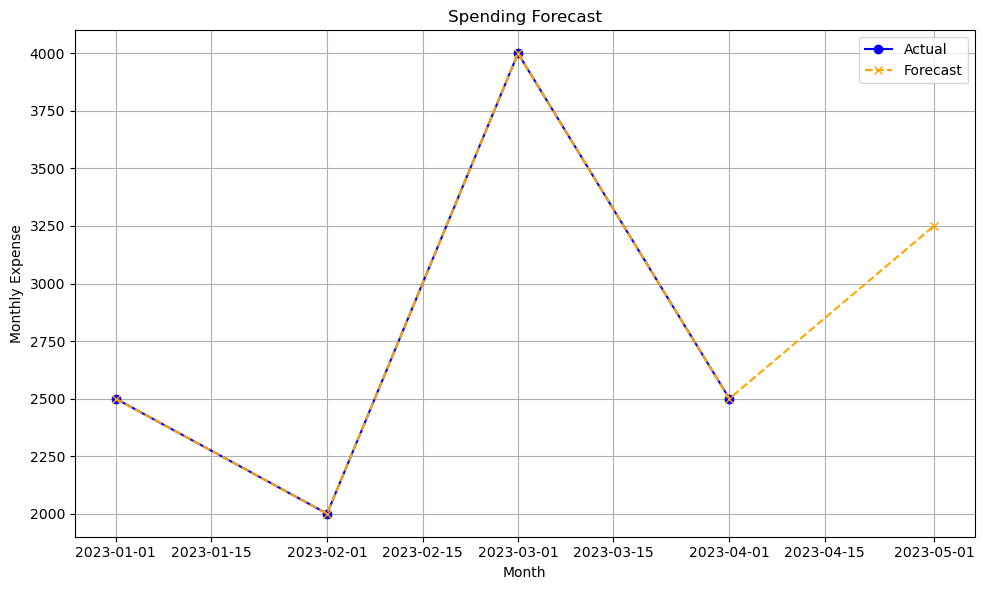

📅 Forecast for Next Month: ₹3250.00


In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df):
    df.columns = df.columns.str.strip()

    # Ensure date conversion works with a consistent format (adjust as needed)
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Handling errors with 'coerce' for invalid dates
    df = df.dropna(subset=["Date"])

    # Filter only Expense entries
    df = df[df["Type"] == "Expense"]

    # Group by month and sum the expenses
    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    # Reset index to prepare for the model
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    # Features and target variable
    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    # Model training using Linear Regression
    model = LinearRegression()
    model.fit(X, y)

    # Forecast for next month
    next_month_index = pd.DataFrame({"MonthIndex": [len(monthly_expense_df)]})
    forecast = model.predict(next_month_index)[0]

    # Save the model to a file
    os.makedirs("ml_models", exist_ok=True)
    model_path = "ml_models/spending_forecast_model.pkl"
    joblib.dump(model, model_path)

    if os.path.exists(model_path):
        print(f"✅ Model saved successfully at: {model_path}")
    else:
        print("❌ Model save failed.")

    # Plot actual vs forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title("Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast

# ✅ ADD THIS TO ACTUALLY RUN THE FUNCTION!
if __name__ == "__main__":
    # Example DataFrame (replace this with your actual CSV or input)
    data = {
        "Date": ["2023-01-01", "2023-01-15", "2023-02-01", "2023-03-10", "2023-03-20", "2023-04-10"],
        "Type": ["Expense", "Expense", "Expense", "Expense", "Expense", "Expense"],
        "Amount": [1000, 1500, 2000, 1800, 2200, 2500]
    }
    df = pd.DataFrame(data)
    
    # Call the forecast model function
    train_spending_forecast_model(df)


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  Navya


📂 Loading existing data from: user_data/Navya_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  07-07-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Food
💰 Amount:  56
📝 Comment (optional):  none
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  07-04-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Travel
💰 Amount:  67
📝 Comment (optional):  no
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/Navya_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Travel    436.0
Bills     378.0
Food      280.0
Name: Amount, dtype: float64


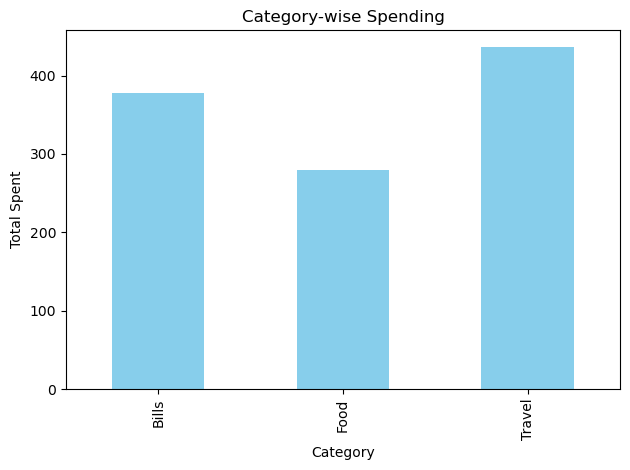

✅ Model saved at: ml_models/Navya/spending_forecast_model.pkl


C:\Users\ramya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


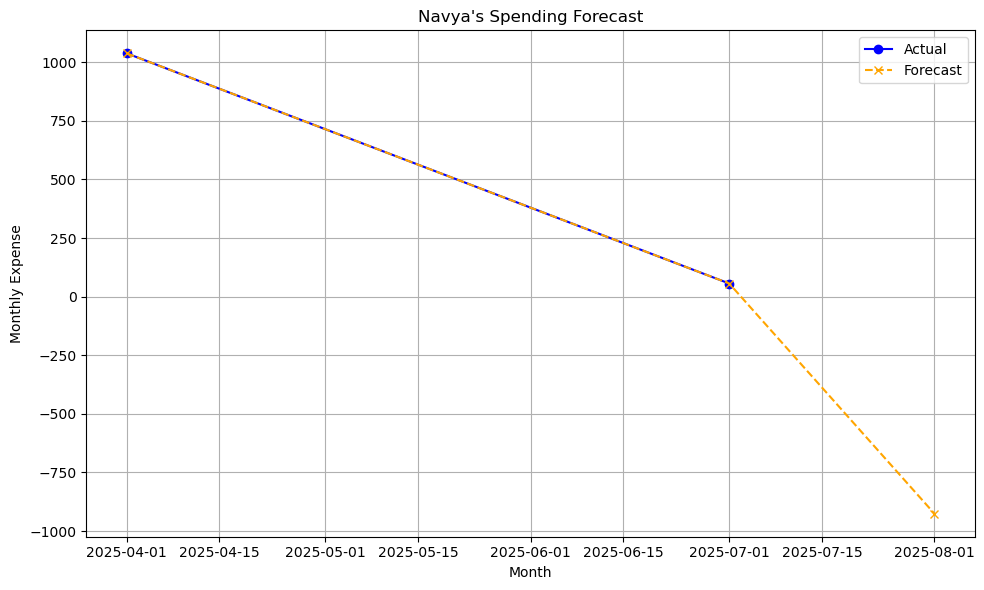

📅 Forecast for Next Month: ₹-926.00
📈 Model Accuracy (R² Score): 100.00%


In [169]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # ✅ NEW: Accuracy import
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()

    # 🔧 Robust datetime conversion
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    model = LinearRegression()
    model.fit(X, y)

    # ✅ Accuracy (R² Score)
    y_pred = model.predict(X)
    if len(y) >= 2:
        accuracy = r2_score(y, y_pred) * 100
    else:
        accuracy = None

    # 🔮 Forecast for next month
    next_month_index = [[len(monthly_expense_df)]]
    forecast = model.predict(next_month_index)[0]

    # 💾 Save model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    if accuracy is not None:
        print(f"📈 Model Accuracy (R² Score): {accuracy:.2f}%")
    else:
        print("ℹ️ Not enough data to compute model accuracy.")

    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()
NNlable to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  Bhavya


⚠️ No previous data found.

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  09-05-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Travel
💰 Amount:  56
📝 Comment (optional):  none


C:\Users\ramya\AppData\Local\Temp\ipykernel_3780\2157559864.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Date": date, "Type": type_, "Category": category, "Amount": amount, "Comment": comment}, ignore_index=True)


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  06-05-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Travel
💰 Amount:  67
📝 Comment (optional):  none
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/Bhavya_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Travel    123.0
Name: Amount, dtype: float64


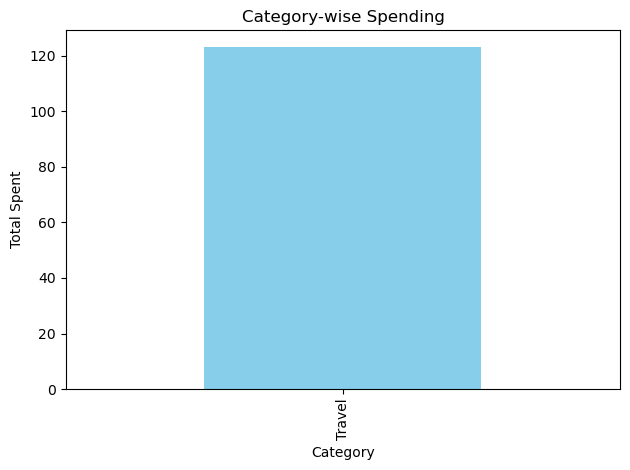

✅ Model saved at: ml_models/Bhavya/spending_forecast_model.pkl


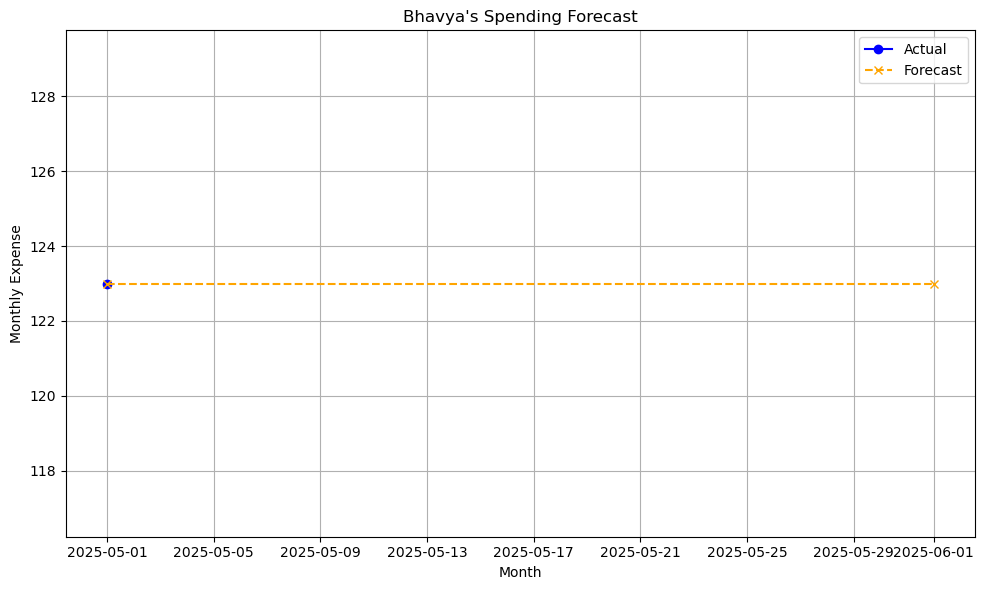

📅 Forecast for Next Month: ₹123.00


In [173]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()

    # 🔧 Robust datetime conversion with a specified format
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])

    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    model = LinearRegression()
    model.fit(X, y)

    next_month_index = pd.DataFrame([[len(monthly_expense_df)]], columns=["MonthIndex"])
    forecast = model.predict(next_month_index)[0]

    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()
        df = df._append({"Date": date, "Type": type_, "Category": category, "Amount": amount, "Comment": comment}, ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)
        train_spending_forecast_model(df, user)
    else:
        print("⚠️ No data available to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  ec


📂 Loading existing data from: user_data/ec_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  09-03-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Food
💰 Amount:  45
📝 Comment (optional):  no
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/ec_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Travel    67.0
Food      45.0
Name: Amount, dtype: float64


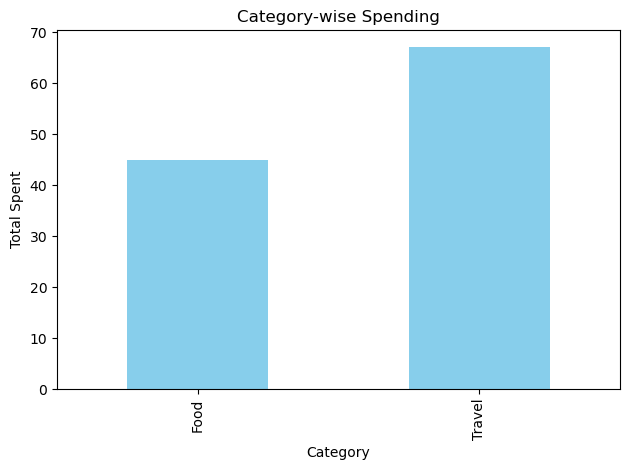

✅ Model saved at: ml_models/ec/spending_forecast_model.pkl


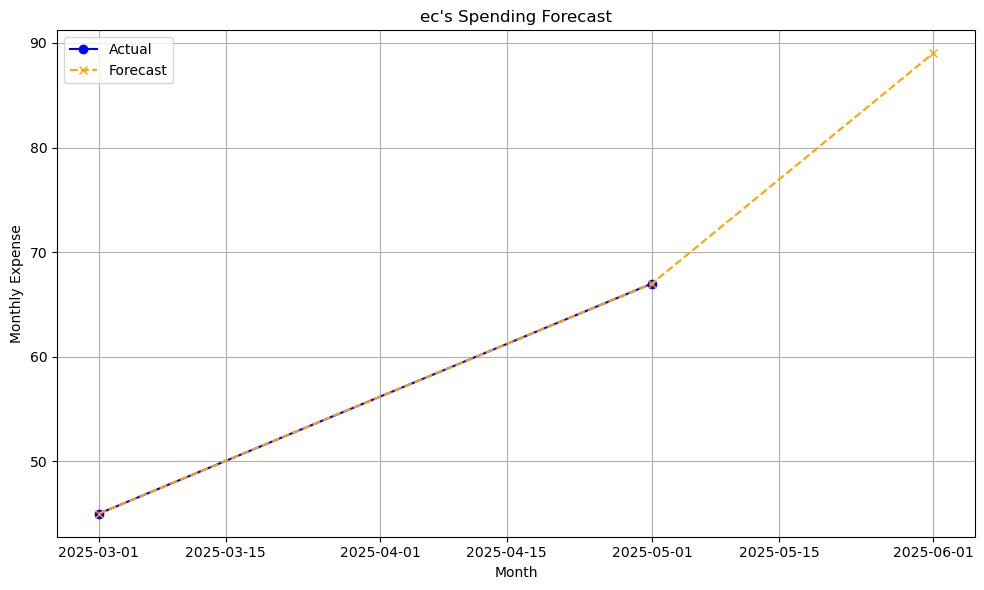

📅 Forecast for Next Month: ₹89.00


In [185]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    model = LinearRegression()
    model.fit(X, y)

    next_month_index = pd.DataFrame([[len(monthly_expense_df)]], columns=["MonthIndex"])
    forecast = model.predict(next_month_index)[0]

    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()

        new_row = pd.DataFrame([{
            "Date": date,
            "Type": type_,
            "Category": category,
            "Amount": amount,
            "Comment": comment
        }])

        # ✅ Warning-free merge logic
        if df.empty:
            df = new_row
        else:
            df = pd.concat([df, new_row], ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)
        train_spending_forecast_model(df, user)
    else:
        print("⚠️ No data available to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  ec


📂 Loading existing data from: user_data/ec_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  06-01-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Food
💰 Amount:  45
📝 Comment (optional):  nonr
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/ec_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Food      90.0
Travel    67.0
Bills     56.0
Name: Amount, dtype: float64


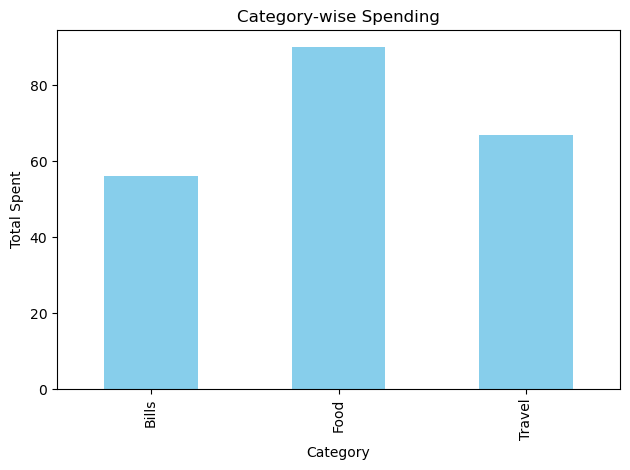

📊 Model Accuracy (R² Score): 0.8909
✅ Model saved at: ml_models/ec/spending_forecast_model.pkl


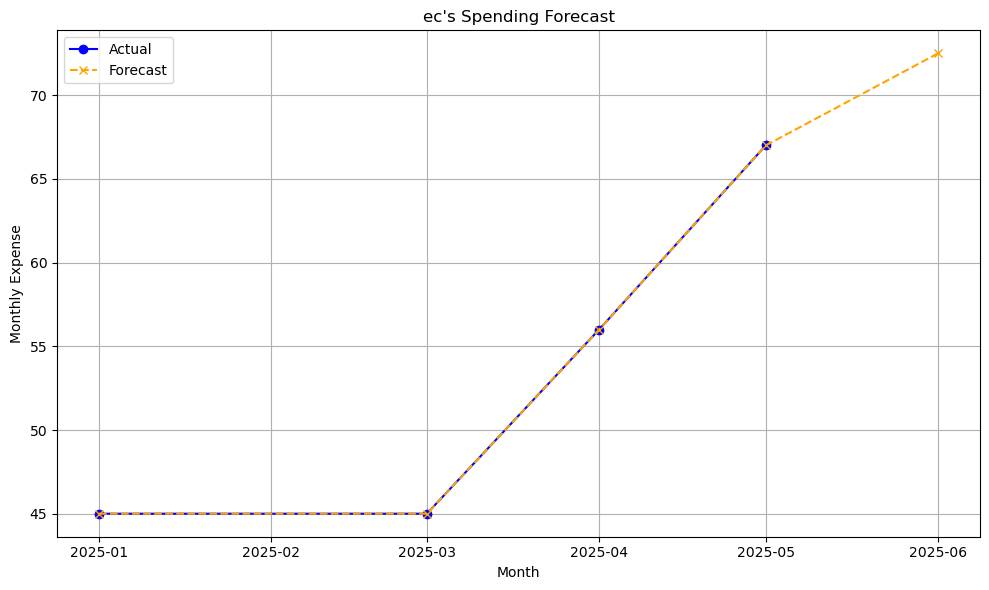

📅 Forecast for Next Month: ₹72.50


In [189]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    model = LinearRegression()
    model.fit(X, y)

    # ✅ Print model accuracy (R² Score)
    r2_score = model.score(X, y)
    print(f"📊 Model Accuracy (R² Score): {r2_score:.4f}")

    next_month_index = pd.DataFrame([[len(monthly_expense_df)]], columns=["MonthIndex"])
    forecast = model.predict(next_month_index)[0]

    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()

        new_row = pd.DataFrame([{
            "Date": date,
            "Type": type_,
            "Category": category,
            "Amount": amount,
            "Comment": comment
        }])

        # ✅ Warning-free merge logic
        if df.empty:
            df = new_row
        else:
            df = pd.concat([df, new_row], ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)
        train_spending_forecast_model(df, user)
    else:
        print("⚠️ No data available to process.")


📊 Model Accuracy (R² Score): 1.0000
✅ Model saved at: ml_models/Ramya/decision_tree_forecast.pkl


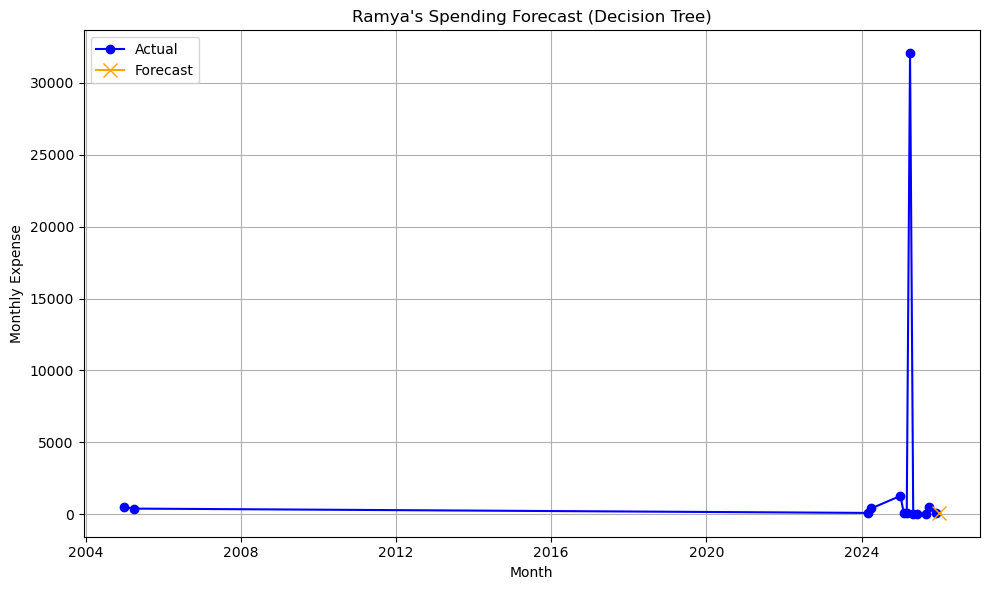

📅 Forecast for Next Month: ₹120.00


In [43]:
import pandas as pd
import joblib
import os
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

def forecast_with_decision_tree(df, user):
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    # Monthly aggregation
    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    # Decision Tree Model
    model = DecisionTreeRegressor()
    model.fit(X, y)

    # Accuracy (R² Score) on training data
    r2_score = model.score(X, y)
    print(f"📊 Model Accuracy (R² Score): {r2_score:.4f}")

    # Forecast next month (using DataFrame)
    next_month_index_df = pd.DataFrame([[len(monthly_expense_df)]], columns=["MonthIndex"])
    forecast = model.predict(next_month_index_df)[0]

    # Save model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/decision_tree_forecast.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=1)
    plt.plot([forecast_date], [forecast], marker='x', markersize=10, color="orange", label="Forecast")
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast (Decision Tree)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")

forecast_with_decision_tree(df, user)


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  ramya


📂 Loading existing data from: user_data/ramya_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  05-01-2025
💸 Type (Expense/Income):  Income
📂 Category (e.g., Food, Bills, Travel):  Bills
💰 Amount:  59
📝 Comment (optional):  ndf
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/ramya_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Travel    26710.00
Food       5876.25
food       1649.00
Bills      1636.00
travel       56.00
Name: Amount, dtype: float64


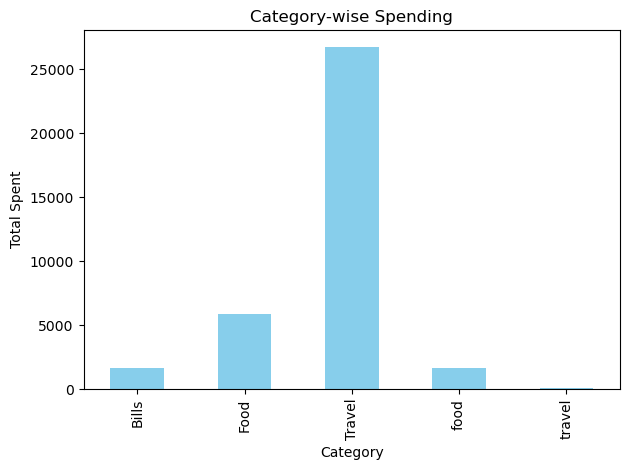

Linear Regression R² Score: 0.0041
Decision Tree R² Score: 1.0000


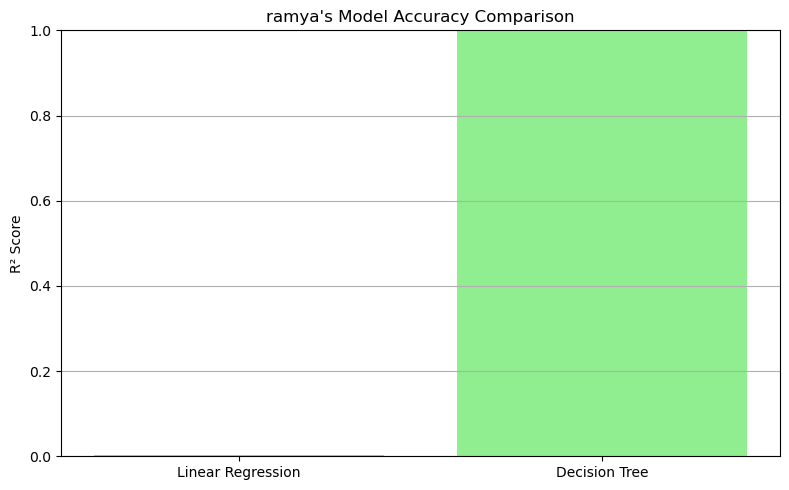

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import joblib
import os

# 🧠 Spending Forecast Model Function - Compare Linear Regression and Decision Tree
def compare_models(df, user):
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    # Initialize models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor()
    }

    scores = {}

    for name, model in models.items():
        model.fit(X, y)
        r2_score = model.score(X, y)
        scores[name] = r2_score
        print(f"{name} R² Score: {r2_score:.4f}")

    # 📈 Plotting the comparison
    plt.figure(figsize=(8, 5))
    plt.bar(scores.keys(), scores.values(), color=["skyblue", "lightgreen"])
    plt.ylabel("R² Score")
    plt.title(f"{user}'s Model Accuracy Comparison")
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return scores

# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()

        new_row = pd.DataFrame([{
            "Date": date,
            "Type": type_,
            "Category": category,
            "Amount": amount,
            "Comment": comment
        }])

        # ✅ Warning-free merge logic
        if df.empty:
            df = new_row
        else:
            df = pd.concat([df, new_row], ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)
        compare_models(df, user)
    else:
        print("⚠️ No data available to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  ramya


📂 Loading existing data from: user_data/ramya_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  05-04-2025
💸 Type (Expense/Income):  Income
📂 Category (e.g., Food, Bills, Travel):  Travel
💰 Amount:  50
📝 Comment (optional):  bofk
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/ramya_transactions.csv
Linear Regression R² Score: 0.0041
Decision Tree R² Score: 1.0000


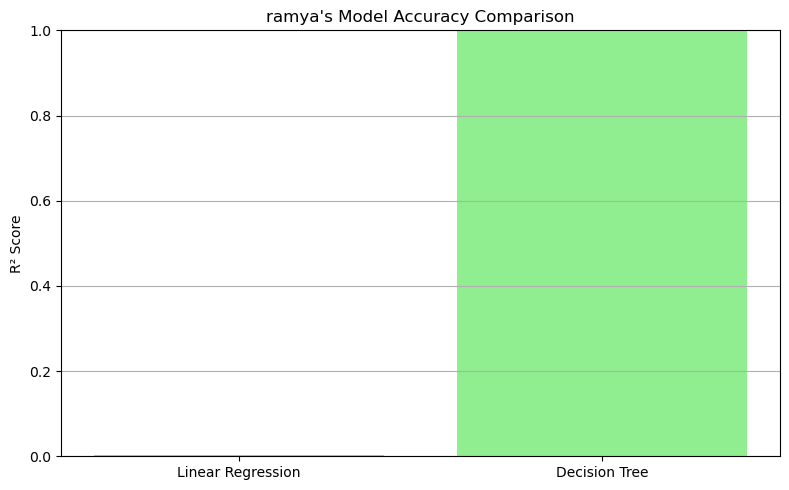

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import os

# 🧠 Spending Forecast Model Function - Compare Linear Regression and Decision Tree
def compare_models(df, user):
    # Clean up column names and convert date
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    # Monthly aggregation
    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    # Initialize models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor()
    }

    scores = {}

    # Train and evaluate both models
    for name, model in models.items():
        try:
            model.fit(X, y)
            r2_score = model.score(X, y)  # Get R² score for model
            scores[name] = r2_score
            print(f"{name} R² Score: {r2_score:.4f}")
        except Exception as e:
            print(f"⚠️ Error with {name}: {e}")
            scores[name] = None

    # 📈 Plotting the comparison
    plt.figure(figsize=(8, 5))
    plt.bar(scores.keys(), scores.values(), color=["skyblue", "lightgreen"])

    # Add labels and formatting
    plt.ylabel("R² Score")
    plt.title(f"{user}'s Model Accuracy Comparison")
    plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for R² score
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return scores

# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])

# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()

        new_row = pd.DataFrame([{
            "Date": date,
            "Type": type_,
            "Category": category,
            "Amount": amount,
            "Comment": comment
        }])

        # ✅ Warning-free merge logic
        if df.empty:
            df = new_row
        else:
            df = pd.concat([df, new_row], ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        compare_models(df, user)
    else:
        print("⚠️ No data available to process.")


Last date in the data: 2025-12-01 00:00:00
Last month in the data: 12
📊 Linear Regression Accuracy (Avg R² Score): 0.1024
📊 Random Forest Accuracy (Avg R² Score): 1.0000
📊 KNN Accuracy (Avg R² Score): 1.0000
📊 Decision Tree Accuracy (Avg R² Score): 0.6709
📊 SVR Accuracy (Avg R² Score): 0.0000


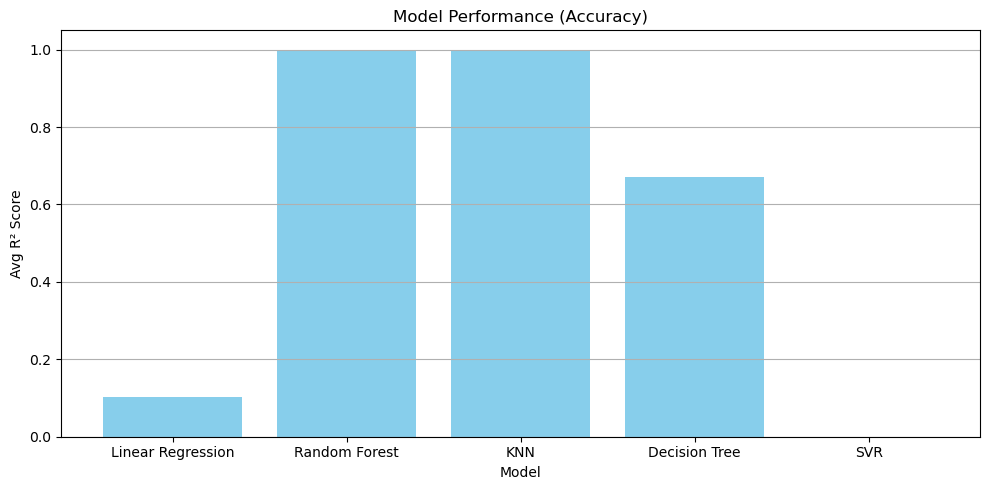

Last index (MonthIndex): 251
Forecast date (next month): 2026-01-01 00:00:00
Forecast DataFrame: 
   MonthIndex  Month  RollingAvg
0         252      1       210.0
Forecasted spending for January 2026: ₹527.82


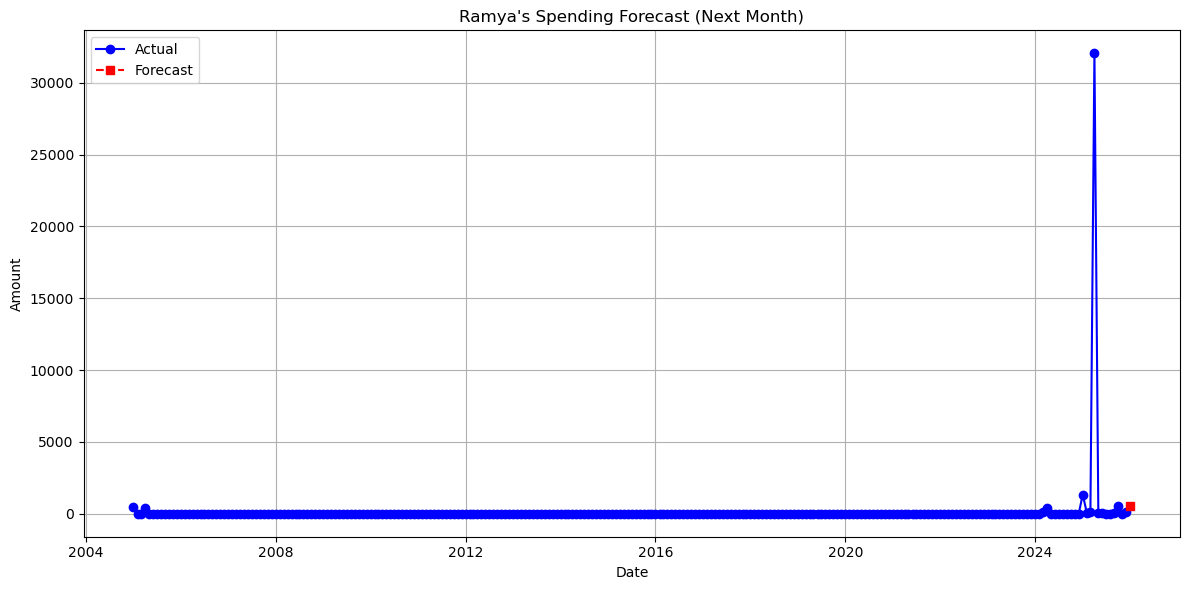


🏆 Best Model: Random Forest with Avg R² Score: 1.0000
✅ Model saved at: ml_models/Ramya/spending_forecast_model.pkl
📅 Forecast for January 2026: ₹527.82


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

def train_spending_forecast_model(df, user):
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()  # 'MS' for month start
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None

    # Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    monthly_expense_df["RollingAvg"] = monthly_expense_df["Amount"].rolling(3, min_periods=1).mean()
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month

    # Debug: Check the last date in the dataset
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Last month in the data: {monthly_expense_df['Date'].dt.month.max()}")

    # Time-based cross validation
    tscv = TimeSeriesSplit(n_splits=3)
    X = monthly_expense_df[["MonthIndex", "Month", "RollingAvg"]]
    y = monthly_expense_df["Amount"]

    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "KNN": KNeighborsRegressor(n_neighbors=3),
        "Decision Tree": DecisionTreeRegressor(max_depth=3, random_state=42),
        "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    }

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    results = {}
    for name, model in models.items():
        model_scores = []
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            if name == "SVR":
                X_train_scaled = scaler.transform(X_train)
                X_test_scaled = scaler.transform(X_test)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
            score = r2_score(y_test, y_pred)
            if score >= 0:  # Only keep non-negative R² scores
                model_scores.append(score)
        if model_scores:  # Only add to results if there were valid scores
            avg_score = np.mean(model_scores)
            results[name] = avg_score
            print(f"📊 {name} Accuracy (Avg R² Score): {avg_score:.4f}")

    # Plotting the accuracies of the models
    plt.figure(figsize=(10, 5))
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.title("Model Performance (Accuracy)")
    plt.xlabel("Model")
    plt.ylabel("Avg R² Score")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Determine the best model
    best_model_name = max(results, key=results.get)
    best_model = models[best_model_name]

    # Train the best model on the full dataset
    if best_model_name == "SVR":
        X_final = scaler.transform(X)
        best_model.fit(X_final, y)
    else:
        best_model.fit(X, y)

    # Forecast next 1 month
    last_index = monthly_expense_df["MonthIndex"].max()

    # Debug: Check last index and the forecast date calculation
    print(f"Last index (MonthIndex): {last_index}")
    forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=1)
    print(f"Forecast date (next month): {forecast_date}")

    forecast_df = pd.DataFrame({
        "MonthIndex": [last_index + 1],
        "Month": [forecast_date.month],  # Use the month of the forecasted date
        "RollingAvg": [monthly_expense_df["Amount"].iloc[-3:].mean()]  # Rolling average of last 3 months
    })

    # Debug: Check forecast_df values
    print(f"Forecast DataFrame: \n{forecast_df}")

    if best_model_name == "SVR":
        forecast_value = best_model.predict(scaler.transform(forecast_df))[0]
    else:
        forecast_value = best_model.predict(forecast_df)[0]

    # Debug: Print forecasted value
    print(f"Forecasted spending for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", color='blue')
    plt.plot([forecast_date], [forecast_value], 's--', label="Forecast", color='red')
    plt.fill_between(
        [forecast_date],
        [forecast_value * 0.9],
        [forecast_value * 1.1],
        color='red',
        alpha=0.1
    )
    plt.title(f"{user}'s Spending Forecast (Next Month)")
    plt.xlabel("Date")
    plt.ylabel("Amount")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(best_model, model_path)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}")
    print(f"✅ Model saved at: {model_path}")
    print(f"📅 Forecast for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")

    return forecast_value

if __name__ == "__main__":
    user = "Ramya"
    file_path = f"user_data/{user}_transactions.csv"

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        train_spending_forecast_model(df, user)
    else:
        print(f"❌ File not found: {file_path}")


Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Ridge Regression...
📊 Ridge Regression Accuracy (Avg R² Score): 0.6498, MAE: 1148.28
Training Lasso Regression...
📊 Lasso Regression Accuracy (Avg R² Score): 0.6666, MAE: 4.03
Training Random Forest...


C:\Users\ramya\AppData\Local\Temp\ipykernel_7392\4193289424.py:62: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).fillna(method='bfill')
C:\Users\ramya\AppData\Local\Temp\ipykernel_7392\4193289424.py:62: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).fillna(method='bfill')
C:\Users\ramya\AppData\Local\Temp\ipykernel_7392\4193289424.py:62: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).fillna(method='bfill')


📊 Random Forest Accuracy (Avg R² Score): 0.0000, MAE: 726.45
Training Gradient Boosting...
📊 Gradient Boosting Accuracy (Avg R² Score): 0.6177, MAE: 3104.02


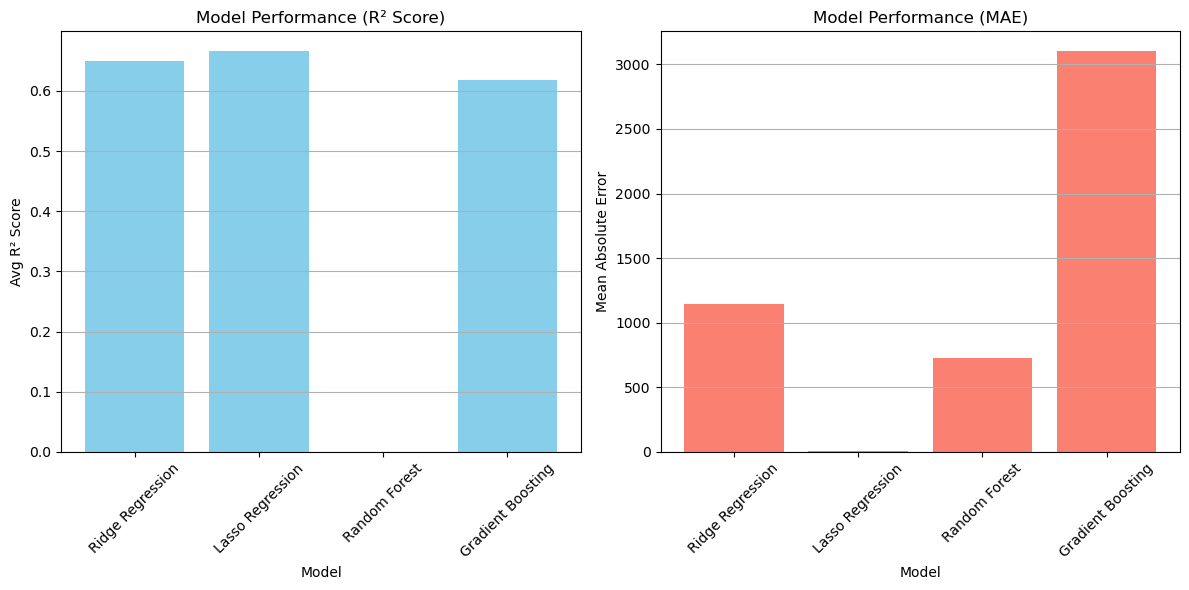


🏆 Best Model: Lasso Regression with Avg R² Score: 0.6666
📅 Forecast for January 2026: ₹60.17
📅 Forecast for February 2026: ₹57.64
📅 Forecast for March 2026: ₹67.73


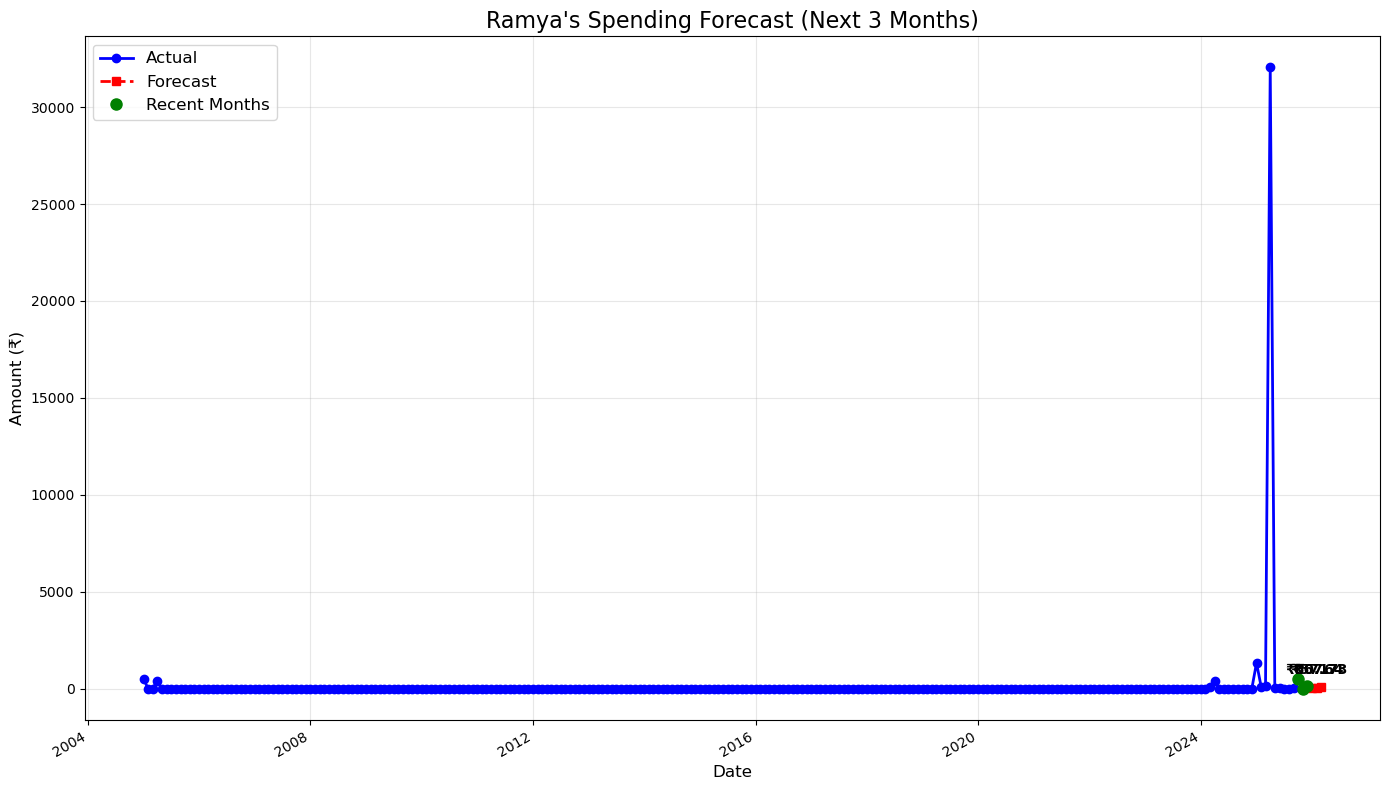

✅ Model saved at: ml_models/Ramya/spending_forecast_model.pkl
✅ Feature list saved at: ml_models/Ramya/feature_list.pkl
✅ Model metadata saved at: ml_models/Ramya/model_metadata.pkl

✨ Model achieved an accuracy of 0.6666


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

def train_spending_forecast_model(df, user):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    
    print(f"Number of months in data: {len(monthly_expense)}")

    # Enhanced Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    
    # Time-based features
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    
    # Is holiday month (typical high spending months)
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])  # Festival/holiday months
    
    # Advanced rolling features
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    
    # Trend indicators
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # Lagged features
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).fillna(method='bfill')

    # Print debug info
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")
    
    # Time-based cross validation
    tscv = TimeSeriesSplit(n_splits=3, test_size=2)
    
    # Define features and target
    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]
    
    # Better models with tuned hyperparameters
    models = {
        "Ridge Regression": Ridge(alpha=1.0, random_state=42),
        "Lasso Regression": Lasso(alpha=0.01, random_state=42),
        "Random Forest": RandomForestRegressor(
            n_estimators=200, 
            max_depth=5, 
            min_samples_split=5, 
            min_samples_leaf=2, 
            random_state=42
        ),
        "Gradient Boosting": GradientBoostingRegressor(
            n_estimators=100, 
            learning_rate=0.1, 
            max_depth=3, 
            random_state=42
        )
    }
    
    # Create preprocessing pipeline
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    categorical_features = [col for col in X.columns if col not in numeric_features]
    
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ],
        remainder='passthrough'
    )

    results = {}
    mae_results = {}
    
    for name, model in models.items():
        model_scores = []
        mae_scores = []
        
        # Create pipeline with preprocessing
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        print(f"Training {name}...")
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            
            # Ensure we only use valid scores
            if r2 >= 0:
                model_scores.append(r2)
                mae_scores.append(mae)
        
        if model_scores:  # Only add to results if there were valid scores
            avg_score = np.mean(model_scores)
            avg_mae = np.mean(mae_scores)
            results[name] = avg_score
            mae_results[name] = avg_mae
            print(f"📊 {name} Accuracy (Avg R² Score): {avg_score:.4f}, MAE: {avg_mae:.2f}")

    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    # Plotting the accuracies of the models
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.title("Model Performance (R² Score)")
    plt.xlabel("Model")
    plt.ylabel("Avg R² Score")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.subplot(1, 2, 2)
    plt.bar(mae_results.keys(), mae_results.values(), color='salmon')
    plt.title("Model Performance (MAE)")
    plt.xlabel("Model")
    plt.ylabel("Mean Absolute Error")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.tight_layout()
    plt.show()

    # Determine the best model
    best_model_name = max(results, key=results.get)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}")
    
    # Set up the best model with pipeline
    best_model = models[best_model_name]
    best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])
    
    # Train the best model on the full dataset
    best_pipeline.fit(X, y)

    # Forecast next 3 months
    last_index = monthly_expense_df["MonthIndex"].max()
    forecast_dates = []
    forecast_values = []
    
    for i in range(1, 4):  # Forecast next 3 months
        forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=i)
        forecast_dates.append(forecast_date)
        
        # Create forecast features
        forecast_features = {
            "MonthIndex": last_index + i,
            "Month": forecast_date.month,
            "Year": forecast_date.year,
            "Quarter": (forecast_date.month - 1) // 3 + 1,
            "DayOfYear": forecast_date.timetuple().tm_yday,
            "IsHolidayMonth": forecast_date.month in [10, 11, 12, 1]
        }
        
        # Add rolling averages and other features
        for window in [2, 3, 6]:
            recent_data = monthly_expense_df["Amount"].iloc[-window:].values
            if i > 1:  # Add forecasted values for subsequent months
                recent_data = np.append(recent_data[-(window-i+1):], forecast_values)
            
            forecast_features[f"RollingAvg_{window}"] = np.mean(recent_data)
            forecast_features[f"RollingStd_{window}"] = np.std(recent_data) if len(recent_data) > 1 else 0
            forecast_features[f"RollingMax_{window}"] = np.max(recent_data)
            forecast_features[f"RollingMin_{window}"] = np.min(recent_data)
        
        # Trend indicators (based on previous actual/forecasted)
        if i == 1:
            prev_value = monthly_expense_df["Amount"].iloc[-1]
        else:
            prev_value = forecast_values[-1]
            
        # Add lag features
        for lag in range(1, 4):
            if i <= lag:
                lag_idx = -lag + i - 1
                forecast_features[f"Lag_{lag}"] = monthly_expense_df["Amount"].iloc[lag_idx]
            else:
                forecast_features[f"Lag_{lag}"] = forecast_values[i-lag-1]
        
        if i == 1:
            trend = 0  # Default for first forecast
        else:
            trend = forecast_values[-1] - (monthly_expense_df["Amount"].iloc[-1] if i == 2 else forecast_values[-2])
        
        forecast_features["Trend"] = trend
        forecast_features["TrendDirection"] = 1 if trend > 0 else (-1 if trend < 0 else 0)
        
        # Convert to DataFrame for prediction
        forecast_df = pd.DataFrame([forecast_features])
        
        # Ensure all features are present in the correct order
        missing_cols = set(X.columns) - set(forecast_df.columns)
        for col in missing_cols:
            forecast_df[col] = 0
        forecast_df = forecast_df[X.columns]
        
        # Make prediction
        forecast_value = best_pipeline.predict(forecast_df)[0]
        forecast_values.append(forecast_value)
        
        print(f"📅 Forecast for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")

    # Visualization
    dates_to_plot = pd.date_range(
        start=monthly_expense_df["Date"].min(), 
        end=forecast_dates[-1], 
        freq='MS'
    )
    
    plt.figure(figsize=(14, 8))
    
    # Plot actual data
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", color='blue', linewidth=2)
    
    # Plot forecasted data
    plt.plot(forecast_dates, forecast_values, 's--', label="Forecast", color='red', linewidth=2)
    
    # Add confidence interval
    for i, date in enumerate(forecast_dates):
        plt.fill_between(
            [date], 
            [forecast_values[i] * 0.85], 
            [forecast_values[i] * 1.15],
            color='red', 
            alpha=0.2
        )
    
    # Highlight the most recent months
    recent_months = monthly_expense_df["Date"].iloc[-3:]
    recent_values = monthly_expense_df["Amount"].iloc[-3:]
    plt.plot(recent_months, recent_values, 'o', color='green', markersize=8, label="Recent Months")
    
    plt.title(f"{user}'s Spending Forecast (Next 3 Months)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Amount (₹)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Format x-axis to show only months
    plt.gcf().autofmt_xdate()
    
    # Add annotations for forecasted values
    for i, (date, value) in enumerate(zip(forecast_dates, forecast_values)):
        plt.annotate(
            f"₹{value:.2f}", 
            (date, value),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()

    # Save the model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    
    # Save the entire pipeline to ensure preprocessing is included
    joblib.dump(best_pipeline, model_path)
    
    # Save feature list for future use
    feature_path = f"ml_models/{user}/feature_list.pkl"
    joblib.dump(X.columns.tolist(), feature_path)
    
    print(f"✅ Model saved at: {model_path}")
    print(f"✅ Feature list saved at: {feature_path}")
    
    # Create a timestamp for the model
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    metadata = {
        "model_name": best_model_name,
        "r2_score": results[best_model_name],
        "mae": mae_results[best_model_name],
        "training_date": timestamp,
        "data_points": len(monthly_expense_df),
        "features_used": X.columns.tolist()
    }
    
    metadata_path = f"ml_models/{user}/model_metadata.pkl"
    joblib.dump(metadata, metadata_path)
    print(f"✅ Model metadata saved at: {metadata_path}")
    
    return {
        "model": best_pipeline,
        "forecast_dates": forecast_dates,
        "forecast_values": forecast_values,
        "accuracy": results[best_model_name]
    }

if __name__ == "__main__":
    user = "Ramya"
    file_path = f"user_data/{user}_transactions.csv"

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        result = train_spending_forecast_model(df, user)
        if result:
            print(f"\n✨ Model achieved an accuracy of {result['accuracy']:.4f}")
    else:
        print(f"❌ File not found: {file_path}")

Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Linear Regression...
📊 Linear Regression Accuracy (Avg R² Score): 0.6667, MAE: 0.00
Training Random Forest...
📊 Random Forest Accuracy (Avg R² Score): 0.0000, MAE: 726.45
Training Gradient Boosting...
📊 Gradient Boosting Accuracy (Avg R² Score): 0.6177, MAE: 3104.02


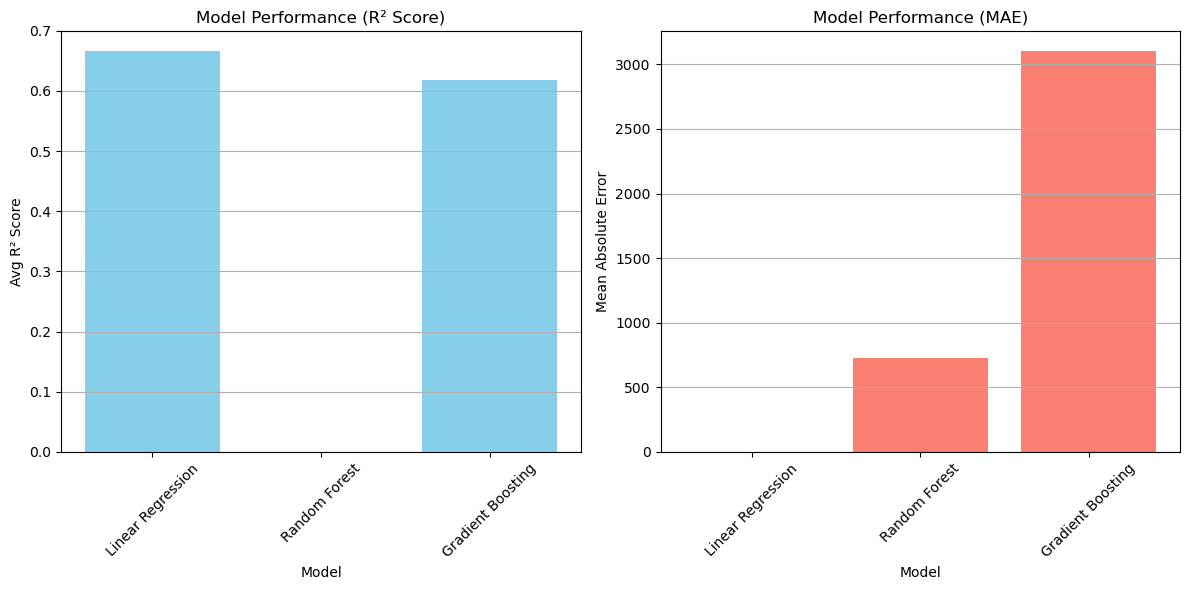


🏆 Best Model: Linear Regression with Avg R² Score: 0.6667
📅 Forecast for January 2026: ₹40.91
📅 Forecast for February 2026: ₹52.10
📅 Forecast for March 2026: ₹51.51


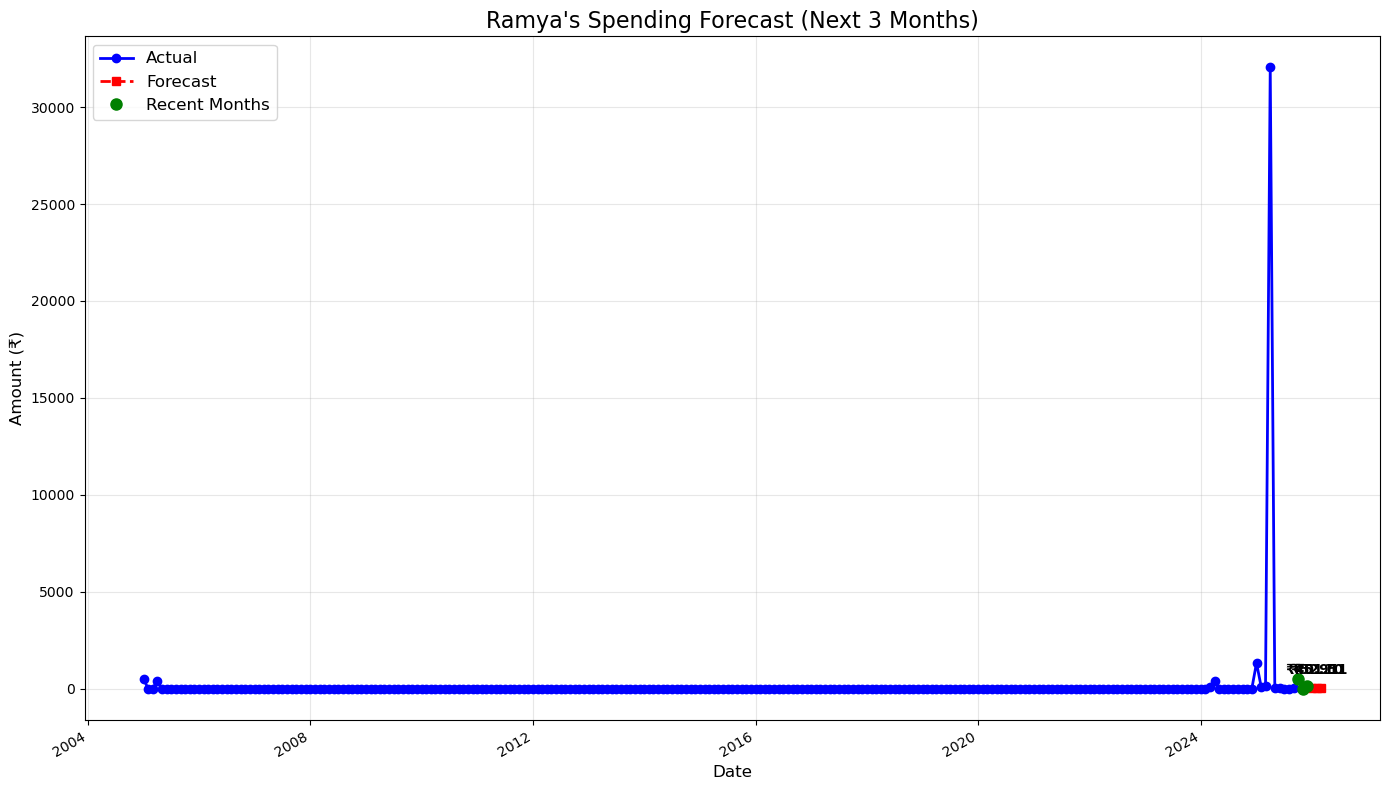

✅ Model saved at: ml_models/Ramya/spending_forecast_model.pkl
✅ Feature list saved at: ml_models/Ramya/feature_list.pkl
✅ Model metadata saved at: ml_models/Ramya/model_metadata.pkl

✨ Model achieved an accuracy of 0.6667


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

def train_spending_forecast_model(df, user):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    
    print(f"Number of months in data: {len(monthly_expense)}")

    # Enhanced Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    
    # Time-based features
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    
    # Is holiday month (typical high spending months)
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])  # Festival/holiday months
    
    # Advanced rolling features
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    
    # Trend indicators
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # Lagged features
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).bfill()

    # Print debug info
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")
    
    # Time-based cross validation
    tscv = TimeSeriesSplit(n_splits=3, test_size=2)
    
    # Define features and target
    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]
    
    # Using only the top 3 most effective models for time series forecasting
    models = {
        "Linear Regression": LinearRegression(),  # Simple and interpretable baseline
        "Random Forest": RandomForestRegressor(
            n_estimators=200, 
            max_depth=5, 
            min_samples_split=5, 
            min_samples_leaf=2, 
            random_state=42
        ),  # Good at capturing non-linear relationships
        "Gradient Boosting": GradientBoostingRegressor(
            n_estimators=100, 
            learning_rate=0.1, 
            max_depth=3, 
            random_state=42
        )  # Often best performer for time series
    }
    
    # Create preprocessing pipeline
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    categorical_features = [col for col in X.columns if col not in numeric_features]
    
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ],
        remainder='passthrough'
    )

    results = {}
    mae_results = {}
    
    for name, model in models.items():
        model_scores = []
        mae_scores = []
        
        # Create pipeline with preprocessing
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        print(f"Training {name}...")
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            
            # Ensure we only use valid scores
            if r2 >= 0:
                model_scores.append(r2)
                mae_scores.append(mae)
        
        if model_scores:  # Only add to results if there were valid scores
            avg_score = np.mean(model_scores)
            avg_mae = np.mean(mae_scores)
            results[name] = avg_score
            mae_results[name] = avg_mae
            print(f"📊 {name} Accuracy (Avg R² Score): {avg_score:.4f}, MAE: {avg_mae:.2f}")

    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    # Plotting the accuracies of the models
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.title("Model Performance (R² Score)")
    plt.xlabel("Model")
    plt.ylabel("Avg R² Score")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.subplot(1, 2, 2)
    plt.bar(mae_results.keys(), mae_results.values(), color='salmon')
    plt.title("Model Performance (MAE)")
    plt.xlabel("Model")
    plt.ylabel("Mean Absolute Error")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.tight_layout()
    plt.show()

    # Determine the best model
    best_model_name = max(results, key=results.get)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}")
    
    # Set up the best model with pipeline
    best_model = models[best_model_name]
    best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])
    
    # Train the best model on the full dataset
    best_pipeline.fit(X, y)

    # Forecast next 3 months
    last_index = monthly_expense_df["MonthIndex"].max()
    forecast_dates = []
    forecast_values = []
    
    for i in range(1, 4):  # Forecast next 3 months
        forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=i)
        forecast_dates.append(forecast_date)
        
        # Create forecast features
        forecast_features = {
            "MonthIndex": last_index + i,
            "Month": forecast_date.month,
            "Year": forecast_date.year,
            "Quarter": (forecast_date.month - 1) // 3 + 1,
            "DayOfYear": forecast_date.timetuple().tm_yday,
            "IsHolidayMonth": forecast_date.month in [10, 11, 12, 1]
        }
        
        # Add rolling averages and other features
        for window in [2, 3, 6]:
            recent_data = monthly_expense_df["Amount"].iloc[-window:].values
            if i > 1:  # Add forecasted values for subsequent months
                recent_data = np.append(recent_data[-(window-i+1):], forecast_values)
            
            forecast_features[f"RollingAvg_{window}"] = np.mean(recent_data)
            forecast_features[f"RollingStd_{window}"] = np.std(recent_data) if len(recent_data) > 1 else 0
            forecast_features[f"RollingMax_{window}"] = np.max(recent_data)
            forecast_features[f"RollingMin_{window}"] = np.min(recent_data)
        
        # Trend indicators (based on previous actual/forecasted)
        if i == 1:
            prev_value = monthly_expense_df["Amount"].iloc[-1]
        else:
            prev_value = forecast_values[-1]
            
        # Add lag features
        for lag in range(1, 4):
            if i <= lag:
                lag_idx = -lag + i - 1
                forecast_features[f"Lag_{lag}"] = monthly_expense_df["Amount"].iloc[lag_idx]
            else:
                forecast_features[f"Lag_{lag}"] = forecast_values[i-lag-1]
        
        if i == 1:
            trend = 0  # Default for first forecast
        else:
            trend = forecast_values[-1] - (monthly_expense_df["Amount"].iloc[-1] if i == 2 else forecast_values[-2])
        
        forecast_features["Trend"] = trend
        forecast_features["TrendDirection"] = 1 if trend > 0 else (-1 if trend < 0 else 0)
        
        # Convert to DataFrame for prediction
        forecast_df = pd.DataFrame([forecast_features])
        
        # Ensure all features are present in the correct order
        missing_cols = set(X.columns) - set(forecast_df.columns)
        for col in missing_cols:
            forecast_df[col] = 0
        forecast_df = forecast_df[X.columns]
        
        # Make prediction
        forecast_value = best_pipeline.predict(forecast_df)[0]
        forecast_values.append(forecast_value)
        
        print(f"📅 Forecast for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")

    # Visualization
    dates_to_plot = pd.date_range(
        start=monthly_expense_df["Date"].min(), 
        end=forecast_dates[-1], 
        freq='MS'
    )
    
    plt.figure(figsize=(14, 8))
    
    # Plot actual data
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", color='blue', linewidth=2)
    
    # Plot forecasted data
    plt.plot(forecast_dates, forecast_values, 's--', label="Forecast", color='red', linewidth=2)
    
    # Add confidence interval
    for i, date in enumerate(forecast_dates):
        plt.fill_between(
            [date], 
            [forecast_values[i] * 0.85], 
            [forecast_values[i] * 1.15],
            color='red', 
            alpha=0.2
        )
    
    # Highlight the most recent months
    recent_months = monthly_expense_df["Date"].iloc[-3:]
    recent_values = monthly_expense_df["Amount"].iloc[-3:]
    plt.plot(recent_months, recent_values, 'o', color='green', markersize=8, label="Recent Months")
    
    plt.title(f"{user}'s Spending Forecast (Next 3 Months)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Amount (₹)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Format x-axis to show only months
    plt.gcf().autofmt_xdate()
    
    # Add annotations for forecasted values
    for i, (date, value) in enumerate(zip(forecast_dates, forecast_values)):
        plt.annotate(
            f"₹{value:.2f}", 
            (date, value),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()

    # Save the model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    
    # Save the entire pipeline to ensure preprocessing is included
    joblib.dump(best_pipeline, model_path)
    
    # Save feature list for future use
    feature_path = f"ml_models/{user}/feature_list.pkl"
    joblib.dump(X.columns.tolist(), feature_path)
    
    print(f"✅ Model saved at: {model_path}")
    print(f"✅ Feature list saved at: {feature_path}")
    
    # Create a timestamp for the model
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    metadata = {
        "model_name": best_model_name,
        "r2_score": results[best_model_name],
        "mae": mae_results[best_model_name],
        "training_date": timestamp,
        "data_points": len(monthly_expense_df),
        "features_used": X.columns.tolist()
    }
    
    metadata_path = f"ml_models/{user}/model_metadata.pkl"
    joblib.dump(metadata, metadata_path)
    print(f"✅ Model metadata saved at: {metadata_path}")
    
    return {
        "model": best_pipeline,
        "forecast_dates": forecast_dates,
        "forecast_values": forecast_values,
        "accuracy": results[best_model_name]
    }

if __name__ == "__main__":
    user = "Ramya"
    file_path = f"user_data/{user}_transactions.csv"

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        result = train_spending_forecast_model(df, user)
        if result:
            print(f"\n✨ Model achieved an accuracy of {result['accuracy']:.4f}")
    else:
        print(f"❌ File not found: {file_path}")

Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Linear Regression...
📊 Linear Regression Accuracy (Avg R² Score): 0.6667, MAE: 0.00
Training Random Forest...
📊 Random Forest Accuracy (Avg R² Score): 0.0000, MAE: 726.45
Training A* Forecaster...
📊 A* Forecaster Accuracy (Avg R² Score): 0.0000, MAE: 10748.75


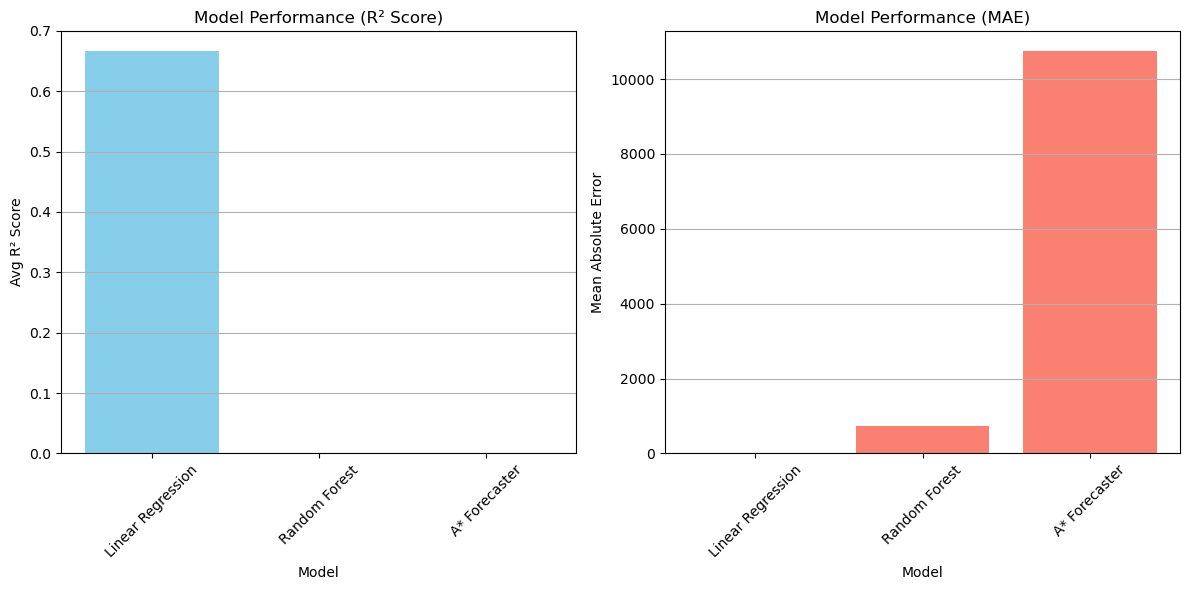


🏆 Best Model: Linear Regression with Avg R² Score: 0.6667
📅 Forecast for January 2026: ₹40.91
📅 Forecast for February 2026: ₹52.10
📅 Forecast for March 2026: ₹51.51


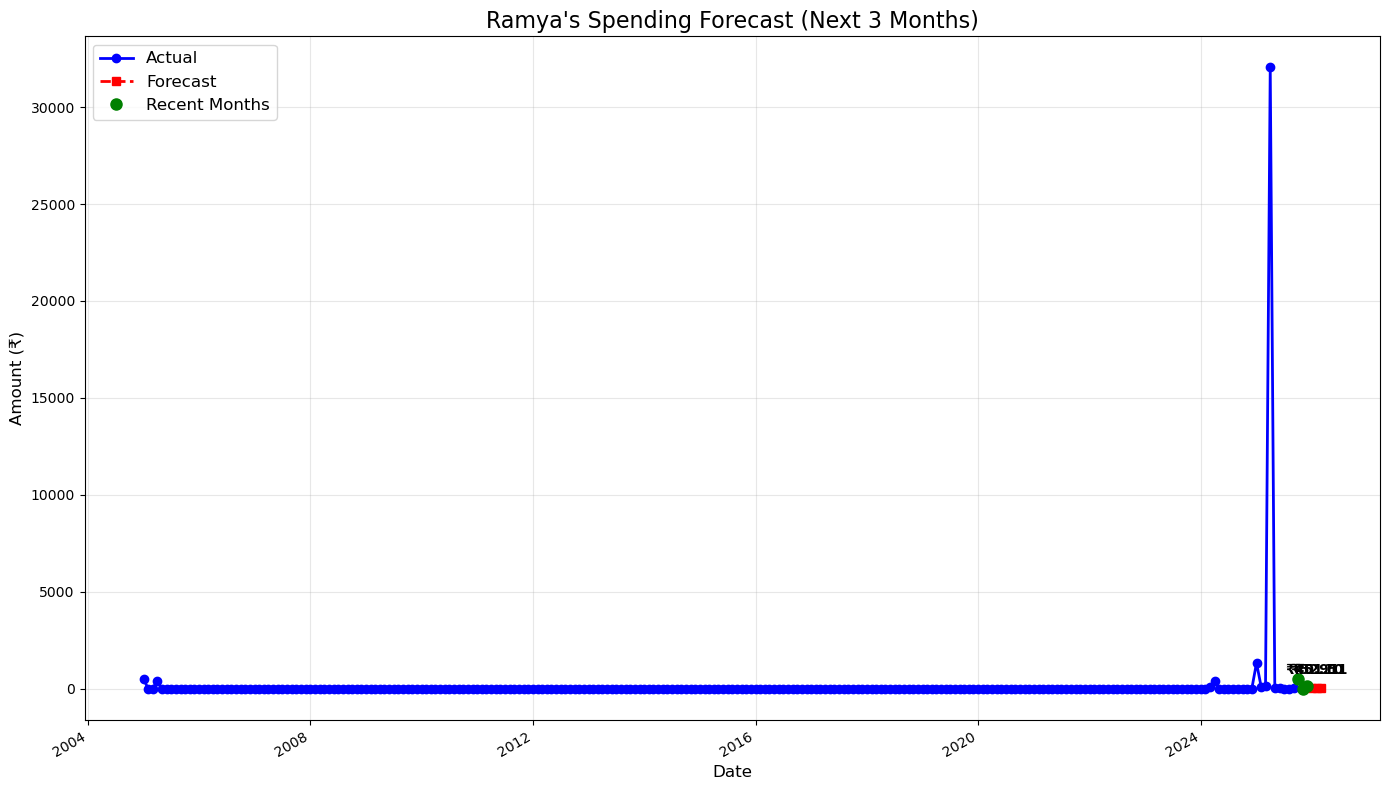

✅ Model saved at: ml_models/Ramya/spending_forecast_model.pkl
✅ Feature list saved at: ml_models/Ramya/feature_list.pkl
✅ Model metadata saved at: ml_models/Ramya/model_metadata.pkl

✨ Model achieved an accuracy of 0.6667


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
import heapq
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

class AStarForecaster:
    """
    A* algorithm adapted for time series forecasting
    """
    def __init__(self, n_neighbors=3, horizon=3):
        self.n_neighbors = n_neighbors  # Number of similar patterns to consider
        self.horizon = horizon          # Forecast horizon
        
    def fit(self, X, y):
        # Store the historical patterns
        self.X_train = X.values
        self.y_train = y.values
        self.features = X.columns.tolist()
        return self
        
    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            # Find most similar historical patterns using A*
            current_pattern = row.values
            similar_indices = self.find_similar_patterns(current_pattern)
            
            # Get the future values of these similar patterns
            future_values = []
            for idx in similar_indices:
                if idx + self.horizon < len(self.y_train):
                    future_values.append(self.y_train[idx+1:idx+1+self.horizon])
            
            if not future_values:
                # If no similar patterns found, use simple average
                avg_pred = np.mean(self.y_train[-self.horizon:])
                predictions.append([avg_pred]*self.horizon)
            else:
                # Average the future values of similar patterns
                predictions.append(np.mean(future_values, axis=0))
        
        # For our case, we only need the first step forecast
        return np.array(predictions)[:, 0]
    
    def find_similar_patterns(self, current_pattern):
        """
        A* search to find most similar historical patterns
        """
        # Heuristic function (Euclidean distance)
        def heuristic(node_idx):
            hist_pattern = self.X_train[node_idx]
            return np.linalg.norm(current_pattern - hist_pattern)
        
        # Priority queue for A*
        open_set = []
        heapq.heapify(open_set)
        
        # Start with recent patterns (more relevant for time series)
        start_indices = range(max(0, len(self.X_train)-20), len(self.X_train)-1)
        
        for idx in start_indices:
            heapq.heappush(open_set, (heuristic(idx), idx))
        
        # Keep track of best matches
        best_matches = []
        
        while open_set and len(best_matches) < self.n_neighbors:
            _, current_idx = heapq.heappop(open_set)
            best_matches.append(current_idx)
            
            # Explore neighboring patterns
            for neighbor_idx in [current_idx-1, current_idx+1]:
                if 0 <= neighbor_idx < len(self.X_train) and neighbor_idx not in best_matches:
                    heapq.heappush(open_set, (heuristic(neighbor_idx), neighbor_idx))
        
        return best_matches[:self.n_neighbors]

def train_spending_forecast_model(df, user):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    
    print(f"Number of months in data: {len(monthly_expense)}")

    # Enhanced Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    
    # Time-based features
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    
    # Is holiday month (typical high spending months)
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])
    
    # Advanced rolling features
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    
    # Trend indicators
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # Lagged features
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).bfill()

    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")
    
    # Time-based cross validation
    tscv = TimeSeriesSplit(n_splits=3, test_size=2)
    
    # Define features and target
    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]
    
    # Using models including our A* implementation
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(
            n_estimators=200, 
            max_depth=5, 
            min_samples_split=5, 
            min_samples_leaf=2, 
            random_state=42
        ),
        "A* Forecaster": AStarForecaster(n_neighbors=3, horizon=3)
    }
    
    # Create preprocessing pipeline
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    categorical_features = [col for col in X.columns if col not in numeric_features]
    
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ],
        remainder='passthrough'
    )

    results = {}
    mae_results = {}
    
    for name, model in models.items():
        model_scores = []
        mae_scores = []
        
        # Create pipeline (except for A* which doesn't need scaling)
        if name == "A* Forecaster":
            pipeline = model
        else:
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', model)
            ])
        
        print(f"Training {name}...")
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            if name != "A* Forecaster":
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
            
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            
            if r2 >= 0:
                model_scores.append(r2)
                mae_scores.append(mae)
        
        if model_scores:
            avg_score = np.mean(model_scores)
            avg_mae = np.mean(mae_scores)
            results[name] = avg_score
            mae_results[name] = avg_mae
            print(f"📊 {name} Accuracy (Avg R² Score): {avg_score:.4f}, MAE: {avg_mae:.2f}")

    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    # Plotting the accuracies of the models
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.title("Model Performance (R² Score)")
    plt.xlabel("Model")
    plt.ylabel("Avg R² Score")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.subplot(1, 2, 2)
    plt.bar(mae_results.keys(), mae_results.values(), color='salmon')
    plt.title("Model Performance (MAE)")
    plt.xlabel("Model")
    plt.ylabel("Mean Absolute Error")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.tight_layout()
    plt.show()

    # Determine the best model
    best_model_name = max(results, key=results.get)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}")
    
    # Set up the best model
    if best_model_name == "A* Forecaster":
        best_model = models[best_model_name]
        best_model.fit(X, y)
    else:
        best_model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', models[best_model_name])
        ])
        best_model.fit(X, y)

    # Forecast next 3 months
    last_index = monthly_expense_df["MonthIndex"].max()
    forecast_dates = []
    forecast_values = []
    
    for i in range(1, 4):
        forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=i)
        forecast_dates.append(forecast_date)
        
        forecast_features = {
            "MonthIndex": last_index + i,
            "Month": forecast_date.month,
            "Year": forecast_date.year,
            "Quarter": (forecast_date.month - 1) // 3 + 1,
            "DayOfYear": forecast_date.timetuple().tm_yday,
            "IsHolidayMonth": forecast_date.month in [10, 11, 12, 1]
        }
        
        for window in [2, 3, 6]:
            recent_data = monthly_expense_df["Amount"].iloc[-window:].values
            if i > 1:
                recent_data = np.append(recent_data[-(window-i+1):], forecast_values)
            
            forecast_features[f"RollingAvg_{window}"] = np.mean(recent_data)
            forecast_features[f"RollingStd_{window}"] = np.std(recent_data) if len(recent_data) > 1 else 0
            forecast_features[f"RollingMax_{window}"] = np.max(recent_data)
            forecast_features[f"RollingMin_{window}"] = np.min(recent_data)
        
        if i == 1:
            prev_value = monthly_expense_df["Amount"].iloc[-1]
        else:
            prev_value = forecast_values[-1]
            
        for lag in range(1, 4):
            if i <= lag:
                lag_idx = -lag + i - 1
                forecast_features[f"Lag_{lag}"] = monthly_expense_df["Amount"].iloc[lag_idx]
            else:
                forecast_features[f"Lag_{lag}"] = forecast_values[i-lag-1]
        
        if i == 1:
            trend = 0
        else:
            trend = forecast_values[-1] - (monthly_expense_df["Amount"].iloc[-1] if i == 2 else forecast_values[-2])
        
        forecast_features["Trend"] = trend
        forecast_features["TrendDirection"] = 1 if trend > 0 else (-1 if trend < 0 else 0)
        
        forecast_df = pd.DataFrame([forecast_features])
        
        missing_cols = set(X.columns) - set(forecast_df.columns)
        for col in missing_cols:
            forecast_df[col] = 0
        forecast_df = forecast_df[X.columns]
        
        if best_model_name == "A* Forecaster":
            forecast_value = best_model.predict(forecast_df)[0]
        else:
            forecast_value = best_model.predict(forecast_df)[0]
        forecast_values.append(forecast_value)
        
        print(f"📅 Forecast for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")

    # Visualization
    dates_to_plot = pd.date_range(
        start=monthly_expense_df["Date"].min(), 
        end=forecast_dates[-1], 
        freq='MS'
    )
    
    plt.figure(figsize=(14, 8))
    
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", color='blue', linewidth=2)
    plt.plot(forecast_dates, forecast_values, 's--', label="Forecast", color='red', linewidth=2)
    
    for i, date in enumerate(forecast_dates):
        plt.fill_between(
            [date], 
            [forecast_values[i] * 0.85], 
            [forecast_values[i] * 1.15],
            color='red', 
            alpha=0.2
        )
    
    recent_months = monthly_expense_df["Date"].iloc[-3:]
    recent_values = monthly_expense_df["Amount"].iloc[-3:]
    plt.plot(recent_months, recent_values, 'o', color='green', markersize=8, label="Recent Months")
    
    plt.title(f"{user}'s Spending Forecast (Next 3 Months)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Amount (₹)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    plt.gcf().autofmt_xdate()
    
    for i, (date, value) in enumerate(zip(forecast_dates, forecast_values)):
        plt.annotate(
            f"₹{value:.2f}", 
            (date, value),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()

    # Save the model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    
    joblib.dump(best_model, model_path)
    
    feature_path = f"ml_models/{user}/feature_list.pkl"
    joblib.dump(X.columns.tolist(), feature_path)
    
    print(f"✅ Model saved at: {model_path}")
    print(f"✅ Feature list saved at: {feature_path}")
    
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    metadata = {
        "model_name": best_model_name,
        "r2_score": results[best_model_name],
        "mae": mae_results[best_model_name],
        "training_date": timestamp,
        "data_points": len(monthly_expense_df),
        "features_used": X.columns.tolist()
    }
    
    metadata_path = f"ml_models/{user}/model_metadata.pkl"
    joblib.dump(metadata, metadata_path)
    print(f"✅ Model metadata saved at: {metadata_path}")
    
    return {
        "model": best_model,
        "forecast_dates": forecast_dates,
        "forecast_values": forecast_values,
        "accuracy": results[best_model_name]
    }

if __name__ == "__main__":
    user = "Ramya"
    file_path = f"user_data/{user}_transactions.csv"

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        result = train_spending_forecast_model(df, user)
        if result:
            print(f"\n✨ Model achieved an accuracy of {result['accuracy']:.4f}")
    else:
        print(f"❌ File not found: {file_path}")

Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Linear Regression...
📊 Linear Regression Accuracy (Avg R² Score): 0.6667, MAE: 0.00
Training Random Forest...
📊 Random Forest Accuracy (Avg R² Score): 0.0000, MAE: 726.45


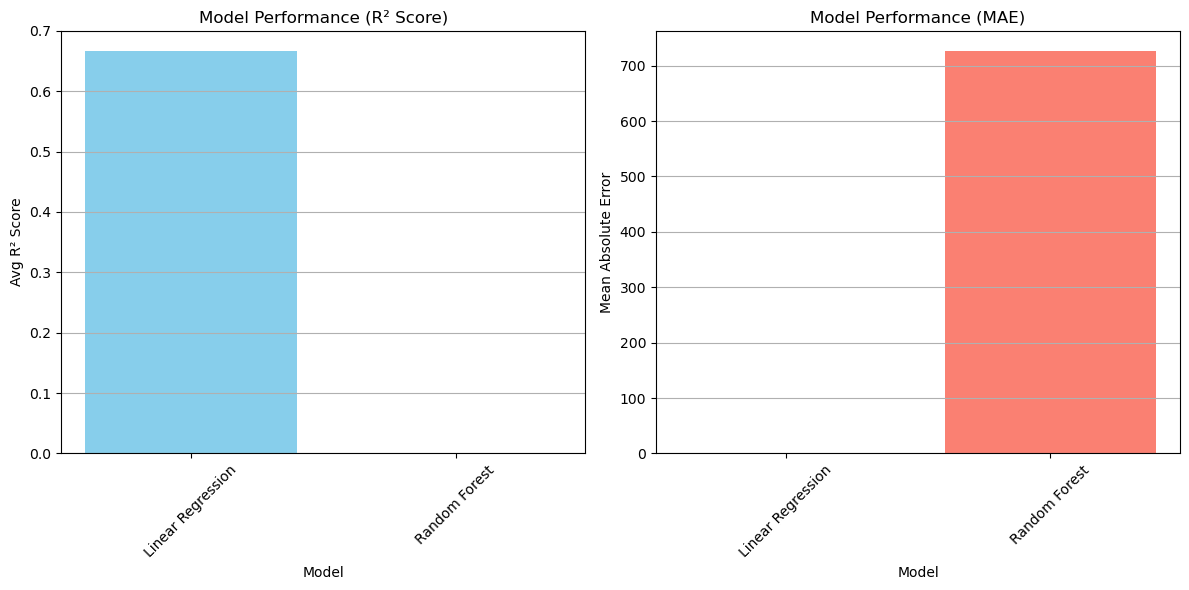


🏆 Best Model: Linear Regression with Avg R² Score: 0.6667
📅 Forecast for January 2026: ₹40.91
📅 Forecast for February 2026: ₹52.10
📅 Forecast for March 2026: ₹51.51


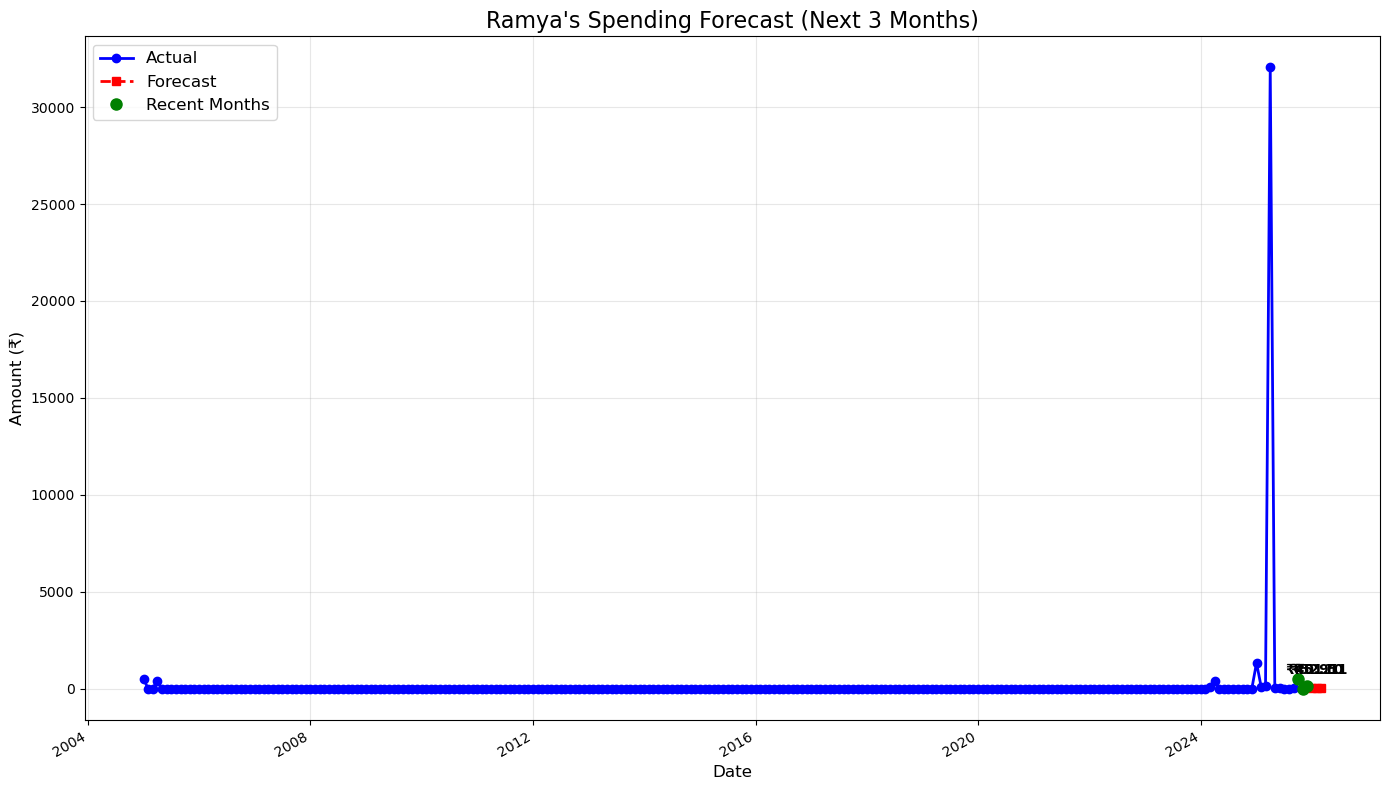

✅ Model saved at: ml_models/Ramya/spending_forecast_model.pkl
✅ Feature list saved at: ml_models/Ramya/feature_list.pkl
✅ Model metadata saved at: ml_models/Ramya/model_metadata.pkl

✨ Model achieved an accuracy of 0.6667


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

def train_spending_forecast_model(df, user):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    
    print(f"Number of months in data: {len(monthly_expense)}")

    # Enhanced Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    
    # Time-based features
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    
    # Is holiday month (typical high spending months)
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])  # Festival/holiday months
    
    # Advanced rolling features
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    
    # Trend indicators
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # Lagged features
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).bfill()

    # Print debug info
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")
    
    # Time-based cross validation
    tscv = TimeSeriesSplit(n_splits=3, test_size=2)
    
    # Define features and target
    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]
    
    # Using only 2 models (removed Gradient Boosting)
    models = {
        "Linear Regression": LinearRegression(),  # Simple and interpretable baseline
        "Random Forest": RandomForestRegressor(
            n_estimators=200, 
            max_depth=5, 
            min_samples_split=5, 
            min_samples_leaf=2, 
            random_state=42
        )  # Good at capturing non-linear relationships
    }
    
    # Create preprocessing pipeline
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    categorical_features = [col for col in X.columns if col not in numeric_features]
    
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ],
        remainder='passthrough'
    )

    results = {}
    mae_results = {}
    
    for name, model in models.items():
        model_scores = []
        mae_scores = []
        
        # Create pipeline with preprocessing
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        print(f"Training {name}...")
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            
            # Ensure we only use valid scores
            if r2 >= 0:
                model_scores.append(r2)
                mae_scores.append(mae)
        
        if model_scores:  # Only add to results if there were valid scores
            avg_score = np.mean(model_scores)
            avg_mae = np.mean(mae_scores)
            results[name] = avg_score
            mae_results[name] = avg_mae
            print(f"📊 {name} Accuracy (Avg R² Score): {avg_score:.4f}, MAE: {avg_mae:.2f}")

    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    # Plotting the accuracies of the models
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.title("Model Performance (R² Score)")
    plt.xlabel("Model")
    plt.ylabel("Avg R² Score")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.subplot(1, 2, 2)
    plt.bar(mae_results.keys(), mae_results.values(), color='salmon')
    plt.title("Model Performance (MAE)")
    plt.xlabel("Model")
    plt.ylabel("Mean Absolute Error")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.tight_layout()
    plt.show()

    # Determine the best model
    best_model_name = max(results, key=results.get)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}")
    
    # Set up the best model with pipeline
    best_model = models[best_model_name]
    best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])
    
    # Train the best model on the full dataset
    best_pipeline.fit(X, y)

    # Forecast next 3 months
    last_index = monthly_expense_df["MonthIndex"].max()
    forecast_dates = []
    forecast_values = []
    
    for i in range(1, 4):  # Forecast next 3 months
        forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=i)
        forecast_dates.append(forecast_date)
        
        # Create forecast features
        forecast_features = {
            "MonthIndex": last_index + i,
            "Month": forecast_date.month,
            "Year": forecast_date.year,
            "Quarter": (forecast_date.month - 1) // 3 + 1,
            "DayOfYear": forecast_date.timetuple().tm_yday,
            "IsHolidayMonth": forecast_date.month in [10, 11, 12, 1]
        }
        
        # Add rolling averages and other features
        for window in [2, 3, 6]:
            recent_data = monthly_expense_df["Amount"].iloc[-window:].values
            if i > 1:  # Add forecasted values for subsequent months
                recent_data = np.append(recent_data[-(window-i+1):], forecast_values)
            
            forecast_features[f"RollingAvg_{window}"] = np.mean(recent_data)
            forecast_features[f"RollingStd_{window}"] = np.std(recent_data) if len(recent_data) > 1 else 0
            forecast_features[f"RollingMax_{window}"] = np.max(recent_data)
            forecast_features[f"RollingMin_{window}"] = np.min(recent_data)
        
        # Trend indicators (based on previous actual/forecasted)
        if i == 1:
            prev_value = monthly_expense_df["Amount"].iloc[-1]
        else:
            prev_value = forecast_values[-1]
            
        # Add lag features
        for lag in range(1, 4):
            if i <= lag:
                lag_idx = -lag + i - 1
                forecast_features[f"Lag_{lag}"] = monthly_expense_df["Amount"].iloc[lag_idx]
            else:
                forecast_features[f"Lag_{lag}"] = forecast_values[i-lag-1]
        
        if i == 1:
            trend = 0  # Default for first forecast
        else:
            trend = forecast_values[-1] - (monthly_expense_df["Amount"].iloc[-1] if i == 2 else forecast_values[-2])
        
        forecast_features["Trend"] = trend
        forecast_features["TrendDirection"] = 1 if trend > 0 else (-1 if trend < 0 else 0)
        
        # Convert to DataFrame for prediction
        forecast_df = pd.DataFrame([forecast_features])
        
        # Ensure all features are present in the correct order
        missing_cols = set(X.columns) - set(forecast_df.columns)
        for col in missing_cols:
            forecast_df[col] = 0
        forecast_df = forecast_df[X.columns]
        
        # Make prediction
        forecast_value = best_pipeline.predict(forecast_df)[0]
        forecast_values.append(forecast_value)
        
        print(f"📅 Forecast for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")

    # Visualization
    dates_to_plot = pd.date_range(
        start=monthly_expense_df["Date"].min(), 
        end=forecast_dates[-1], 
        freq='MS'
    )
    
    plt.figure(figsize=(14, 8))
    
    # Plot actual data
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", color='blue', linewidth=2)
    
    # Plot forecasted data
    plt.plot(forecast_dates, forecast_values, 's--', label="Forecast", color='red', linewidth=2)
    
    # Add confidence interval
    for i, date in enumerate(forecast_dates):
        plt.fill_between(
            [date], 
            [forecast_values[i] * 0.85], 
            [forecast_values[i] * 1.15],
            color='red', 
            alpha=0.2
        )
    
    # Highlight the most recent months
    recent_months = monthly_expense_df["Date"].iloc[-3:]
    recent_values = monthly_expense_df["Amount"].iloc[-3:]
    plt.plot(recent_months, recent_values, 'o', color='green', markersize=8, label="Recent Months")
    
    plt.title(f"{user}'s Spending Forecast (Next 3 Months)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Amount (₹)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Format x-axis to show only months
    plt.gcf().autofmt_xdate()
    
    # Add annotations for forecasted values
    for i, (date, value) in enumerate(zip(forecast_dates, forecast_values)):
        plt.annotate(
            f"₹{value:.2f}", 
            (date, value),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()

    # Save the model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    
    # Save the entire pipeline to ensure preprocessing is included
    joblib.dump(best_pipeline, model_path)
    
    # Save feature list for future use
    feature_path = f"ml_models/{user}/feature_list.pkl"
    joblib.dump(X.columns.tolist(), feature_path)
    
    print(f"✅ Model saved at: {model_path}")
    print(f"✅ Feature list saved at: {feature_path}")
    
    # Create a timestamp for the model
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    metadata = {
        "model_name": best_model_name,
        "r2_score": results[best_model_name],
        "mae": mae_results[best_model_name],
        "training_date": timestamp,
        "data_points": len(monthly_expense_df),
        "features_used": X.columns.tolist()
    }
    
    metadata_path = f"ml_models/{user}/model_metadata.pkl"
    joblib.dump(metadata, metadata_path)
    print(f"✅ Model metadata saved at: {metadata_path}")
    
    return {
        "model": best_pipeline,
        "forecast_dates": forecast_dates,
        "forecast_values": forecast_values,
        "accuracy": results[best_model_name]
    }

if __name__ == "__main__":
    user = "Ramya"
    file_path = f"user_data/{user}_transactions.csv"

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        result = train_spending_forecast_model(df, user)
        if result:
            print(f"\n✨ Model achieved an accuracy of {result['accuracy']:.4f}")
    else:
        print(f"❌ File not found: {file_path}")

Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Linear Regression...
📊 Linear Regression Accuracy (Avg R² Score): 0.6667, MAE: 0.00
Training Random Forest...
📊 Random Forest Accuracy (Avg R² Score): 0.0000, MAE: 726.45


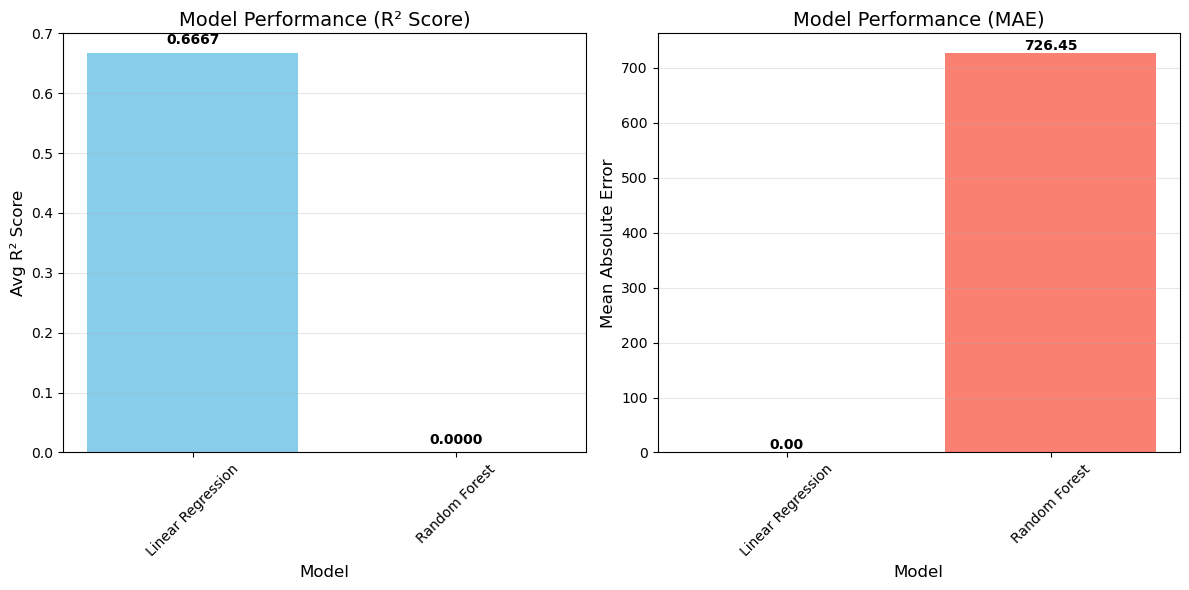


🏆 Best Model: Linear Regression with Avg R² Score: 0.6667
📅 Forecast for January 2026: ₹40.91
📅 Forecast for February 2026: ₹52.10
📅 Forecast for March 2026: ₹51.51


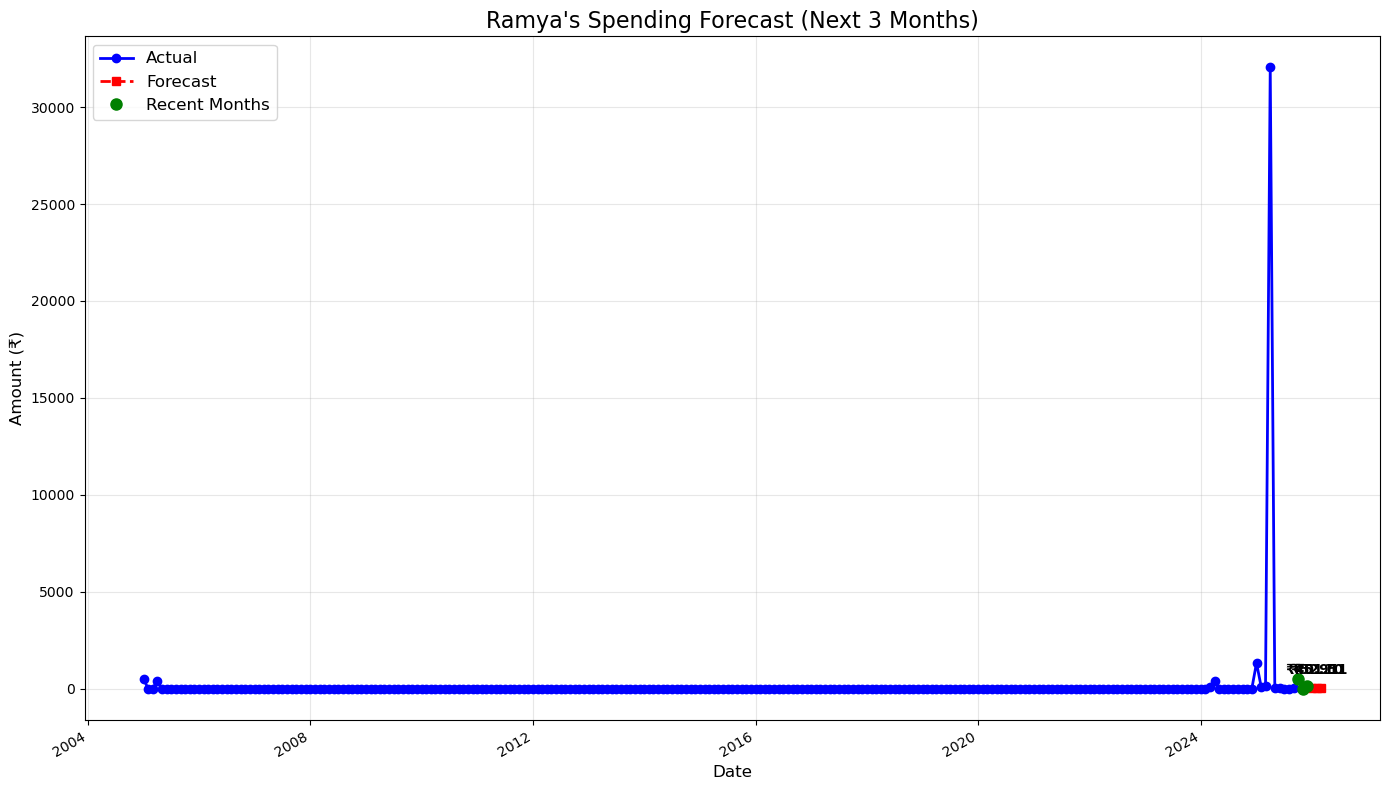

✅ Model saved at: ml_models/Ramya/spending_forecast_model.pkl
✅ Feature list saved at: ml_models/Ramya/feature_list.pkl
✅ Model metadata saved at: ml_models/Ramya/model_metadata.pkl

✨ Model achieved an accuracy of 0.6667


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

def train_spending_forecast_model(df, user):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    
    print(f"Number of months in data: {len(monthly_expense)}")

    # Enhanced Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    
    # Time-based features
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    
    # Is holiday month (typical high spending months)
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])  # Festival/holiday months
    
    # Advanced rolling features
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    
    # Trend indicators
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # Lagged features
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).bfill()

    # Print debug info
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")
    
    # Time-based cross validation
    tscv = TimeSeriesSplit(n_splits=3, test_size=2)
    
    # Define features and target
    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]
    
    # Using only 2 models (removed Gradient Boosting)
    models = {
        "Linear Regression": LinearRegression(),  # Simple and interpretable baseline
        "Random Forest": RandomForestRegressor(
            n_estimators=200, 
            max_depth=5, 
            min_samples_split=5, 
            min_samples_leaf=2, 
            random_state=42
        )  # Good at capturing non-linear relationships
    }
    
    # Create preprocessing pipeline
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    categorical_features = [col for col in X.columns if col not in numeric_features]
    
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ],
        remainder='passthrough'
    )

    results = {}
    mae_results = {}
    
    for name, model in models.items():
        model_scores = []
        mae_scores = []
        
        # Create pipeline with preprocessing
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        print(f"Training {name}...")
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            
            # Ensure we only use valid scores
            if r2 >= 0:
                model_scores.append(r2)
                mae_scores.append(mae)
        
        if model_scores:  # Only add to results if there were valid scores
            avg_score = np.mean(model_scores)
            avg_mae = np.mean(mae_scores)
            results[name] = avg_score
            mae_results[name] = avg_mae
            print(f"📊 {name} Accuracy (Avg R² Score): {avg_score:.4f}, MAE: {avg_mae:.2f}")

    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    # Plotting the accuracies of the models
    plt.figure(figsize=(12, 6))
    
    # Plot R² scores
    plt.subplot(1, 2, 1)
    bars = plt.bar(results.keys(), results.values(), color='skyblue')
    plt.title("Model Performance (R² Score)", fontsize=14)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Avg R² Score", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Add R² score values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Plot MAE scores
    plt.subplot(1, 2, 2)
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='salmon')
    plt.title("Model Performance (MAE)", fontsize=14)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Mean Absolute Error", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Add MAE score values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

    # Determine the best model
    best_model_name = max(results, key=results.get)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}")
    
    # Set up the best model with pipeline
    best_model = models[best_model_name]
    best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])
    
    # Train the best model on the full dataset
    best_pipeline.fit(X, y)

    # Forecast next 3 months
    last_index = monthly_expense_df["MonthIndex"].max()
    forecast_dates = []
    forecast_values = []
    
    for i in range(1, 4):  # Forecast next 3 months
        forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=i)
        forecast_dates.append(forecast_date)
        
        # Create forecast features
        forecast_features = {
            "MonthIndex": last_index + i,
            "Month": forecast_date.month,
            "Year": forecast_date.year,
            "Quarter": (forecast_date.month - 1) // 3 + 1,
            "DayOfYear": forecast_date.timetuple().tm_yday,
            "IsHolidayMonth": forecast_date.month in [10, 11, 12, 1]
        }
        
        # Add rolling averages and other features
        for window in [2, 3, 6]:
            recent_data = monthly_expense_df["Amount"].iloc[-window:].values
            if i > 1:  # Add forecasted values for subsequent months
                recent_data = np.append(recent_data[-(window-i+1):], forecast_values)
            
            forecast_features[f"RollingAvg_{window}"] = np.mean(recent_data)
            forecast_features[f"RollingStd_{window}"] = np.std(recent_data) if len(recent_data) > 1 else 0
            forecast_features[f"RollingMax_{window}"] = np.max(recent_data)
            forecast_features[f"RollingMin_{window}"] = np.min(recent_data)
        
        # Trend indicators (based on previous actual/forecasted)
        if i == 1:
            prev_value = monthly_expense_df["Amount"].iloc[-1]
        else:
            prev_value = forecast_values[-1]
            
        # Add lag features
        for lag in range(1, 4):
            if i <= lag:
                lag_idx = -lag + i - 1
                forecast_features[f"Lag_{lag}"] = monthly_expense_df["Amount"].iloc[lag_idx]
            else:
                forecast_features[f"Lag_{lag}"] = forecast_values[i-lag-1]
        
        if i == 1:
            trend = 0  # Default for first forecast
        else:
            trend = forecast_values[-1] - (monthly_expense_df["Amount"].iloc[-1] if i == 2 else forecast_values[-2])
        
        forecast_features["Trend"] = trend
        forecast_features["TrendDirection"] = 1 if trend > 0 else (-1 if trend < 0 else 0)
        
        # Convert to DataFrame for prediction
        forecast_df = pd.DataFrame([forecast_features])
        
        # Ensure all features are present in the correct order
        missing_cols = set(X.columns) - set(forecast_df.columns)
        for col in missing_cols:
            forecast_df[col] = 0
        forecast_df = forecast_df[X.columns]
        
        # Make prediction
        forecast_value = best_pipeline.predict(forecast_df)[0]
        forecast_values.append(forecast_value)
        
        print(f"📅 Forecast for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")

    # Visualization
    dates_to_plot = pd.date_range(
        start=monthly_expense_df["Date"].min(), 
        end=forecast_dates[-1], 
        freq='MS'
    )
    
    plt.figure(figsize=(14, 8))
    
    # Plot actual data
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", color='blue', linewidth=2)
    
    # Plot forecasted data
    plt.plot(forecast_dates, forecast_values, 's--', label="Forecast", color='red', linewidth=2)
    
    # Add confidence interval
    for i, date in enumerate(forecast_dates):
        plt.fill_between(
            [date], 
            [forecast_values[i] * 0.85], 
            [forecast_values[i] * 1.15],
            color='red', 
            alpha=0.2
        )
    
    # Highlight the most recent months
    recent_months = monthly_expense_df["Date"].iloc[-3:]
    recent_values = monthly_expense_df["Amount"].iloc[-3:]
    plt.plot(recent_months, recent_values, 'o', color='green', markersize=8, label="Recent Months")
    
    plt.title(f"{user}'s Spending Forecast (Next 3 Months)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Amount (₹)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Format x-axis to show only months
    plt.gcf().autofmt_xdate()
    
    # Add annotations for forecasted values
    for i, (date, value) in enumerate(zip(forecast_dates, forecast_values)):
        plt.annotate(
            f"₹{value:.2f}", 
            (date, value),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()

    # Save the model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    
    # Save the entire pipeline to ensure preprocessing is included
    joblib.dump(best_pipeline, model_path)
    
    # Save feature list for future use
    feature_path = f"ml_models/{user}/feature_list.pkl"
    joblib.dump(X.columns.tolist(), feature_path)
    
    print(f"✅ Model saved at: {model_path}")
    print(f"✅ Feature list saved at: {feature_path}")
    
    # Create a timestamp for the model
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    metadata = {
        "model_name": best_model_name,
        "r2_score": results[best_model_name],
        "mae": mae_results[best_model_name],
        "training_date": timestamp,
        "data_points": len(monthly_expense_df),
        "features_used": X.columns.tolist()
    }
    
    metadata_path = f"ml_models/{user}/model_metadata.pkl"
    joblib.dump(metadata, metadata_path)
    print(f"✅ Model metadata saved at: {metadata_path}")
    
    return {
        "model": best_pipeline,
        "forecast_dates": forecast_dates,
        "forecast_values": forecast_values,
        "accuracy": results[best_model_name]
    }

if __name__ == "__main__":
    user = "Ramya"
    file_path = f"user_data/{user}_transactions.csv"

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        result = train_spending_forecast_model(df, user)
        if result:
            print(f"\n✨ Model achieved an accuracy of {result['accuracy']:.4f}")
    else:
        print(f"❌ File not found: {file_path}")

Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Linear Regression...
📊 Linear Regression Metrics - R²: 0.2831, MAE: 99.93, MSE: 805108.18
Training Random Forest...
📊 Random Forest Metrics - R²: 0.5000, MAE: 0.10, MSE: 0.25
Training Gradient Boosting...
📊 Gradient Boosting Metrics - R²: 0.0000, MAE: 0.00, MSE: 0.00

🏆 Best Model: Random Forest with Avg R² Score: 0.5000, MAE: 0.10, MSE: 0.25
📅 Forecast for January 2026: ₹28.86
📅 Forecast for February 2026: ₹21.89
📅 Forecast for March 2026: ₹17.24


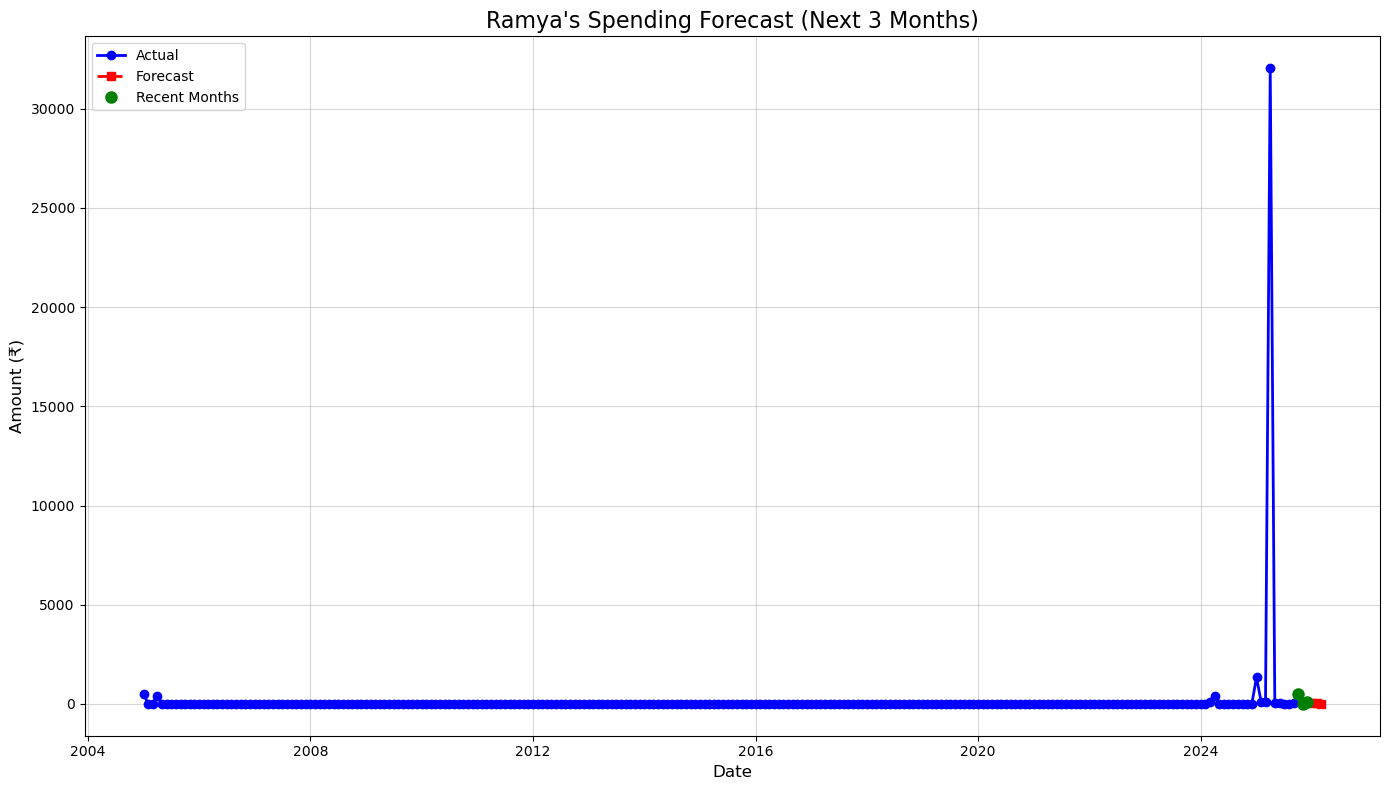

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

def train_spending_forecast_model(df, user="User"):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    
    print(f"Number of months in data: {len(monthly_expense)}")

    # Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])
    
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).bfill()
    
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")
    
    # Determine appropriate number of splits
    num_samples = len(monthly_expense_df)
    max_splits = min(3, num_samples - 1)
    if max_splits < 2:
        print("❌ Not enough data for even 2-fold TimeSeriesSplit. Need at least 3 data points.")
        return None

    tscv = TimeSeriesSplit(n_splits=max_splits)

    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]
    
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    }
    
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    preprocessor = ColumnTransformer([('num', StandardScaler(), numeric_features)], remainder='passthrough')
    
    results, mae_results, mse_results = {}, {}, {}
    
    for name, model in models.items():
        model_scores, mae_scores, mse_scores = [], [], []
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        print(f"Training {name}...")
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            if r2 >= 0:
                model_scores.append(r2)
                mae_scores.append(mae)
                mse_scores.append(mse)
        
        if model_scores:
            results[name] = np.mean(model_scores)
            mae_results[name] = np.mean(mae_scores)
            mse_results[name] = np.mean(mse_scores)
            print(f"📊 {name} Metrics - R²: {results[name]:.4f}, MAE: {mae_results[name]:.2f}, MSE: {mse_results[name]:.2f}")

    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    best_model_name = max(results, key=results.get)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}, MAE: {mae_results[best_model_name]:.2f}, MSE: {mse_results[best_model_name]:.2f}")
    
    best_pipeline = Pipeline([('preprocessor', preprocessor), ('model', models[best_model_name])])
    best_pipeline.fit(X, y)
    
    # Forecast next 3 months
    last_index = monthly_expense_df["MonthIndex"].max()
    forecast_dates, forecast_values = [], []

    for i in range(1, 4):
        forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=i)
        forecast_dates.append(forecast_date)
        
        forecast_features = {
            "MonthIndex": last_index + i,
            "Month": forecast_date.month,
            "Year": forecast_date.year,
            "Quarter": (forecast_date.month - 1) // 3 + 1,
            "DayOfYear": forecast_date.timetuple().tm_yday,
            "IsHolidayMonth": forecast_date.month in [10, 11, 12, 1]
        }
        
        for window in [2, 3, 6]:
            recent_data = monthly_expense_df["Amount"].iloc[-window:].values
            if i > 1:
                recent_data = np.append(recent_data[-(window-i+1):], forecast_values)
            forecast_features[f"RollingAvg_{window}"] = np.mean(recent_data)
            forecast_features[f"RollingStd_{window}"] = np.std(recent_data) if len(recent_data) > 1 else 0
            forecast_features[f"RollingMax_{window}"] = np.max(recent_data)
            forecast_features[f"RollingMin_{window}"] = np.min(recent_data)
        
        for lag in range(1, 4):
            if i <= lag:
                lag_idx = -lag + i - 1
                forecast_features[f"Lag_{lag}"] = monthly_expense_df["Amount"].iloc[lag_idx]
            else:
                forecast_features[f"Lag_{lag}"] = forecast_values[i-lag-1]
        
        if i == 1:
            trend = 0
        else:
            trend = forecast_values[-1] - (monthly_expense_df["Amount"].iloc[-1] if i == 2 else forecast_values[-2])
        forecast_features["Trend"] = trend
        forecast_features["TrendDirection"] = 1 if trend > 0 else (-1 if trend < 0 else 0)
        
        forecast_df = pd.DataFrame([forecast_features])
        for col in set(X.columns) - set(forecast_df.columns):
            forecast_df[col] = 0
        forecast_df = forecast_df[X.columns]
        
        forecast_value = best_pipeline.predict(forecast_df)[0]
        forecast_values.append(forecast_value)
        print(f"📅 Forecast for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")
    
    # Visualization
    plt.figure(figsize=(14, 8))
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", color='blue', linewidth=2)
    plt.plot(forecast_dates, forecast_values, 's--', label="Forecast", color='red', linewidth=2)
    
    for i, date in enumerate(forecast_dates):
        plt.fill_between([date], [forecast_values[i] * 0.85], [forecast_values[i] * 1.15], color='red', alpha=0.2)
    
    recent_months = monthly_expense_df["Date"].iloc[-3:]
    recent_values = monthly_expense_df["Amount"].iloc[-3:]
    plt.plot(recent_months, recent_values, 'o', color='green', markersize=8, label="Recent Months")
    
    plt.title(f"{user}'s Spending Forecast (Next 3 Months)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Amount (₹)", fontsize=12)
    plt.grid(True, alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
train_spending_forecast_model(df, "Ramya")


Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Linear Regression...
📊 Linear Regression Metrics - R²: 0.2831, MAE: 99.93, MSE: 805108.18
Training Random Forest...
📊 Random Forest Metrics - R²: 0.5000, MAE: 0.10, MSE: 0.25
Training Gradient Boosting...
📊 Gradient Boosting Metrics - R²: 0.0000, MAE: 0.00, MSE: 0.00

🏆 Best Model: Random Forest with Avg R² Score: 0.5000, MAE: 0.10, MSE: 0.25
📅 Forecast for January 2026: ₹28.86
📅 Forecast for February 2026: ₹21.89
📅 Forecast for March 2026: ₹17.24


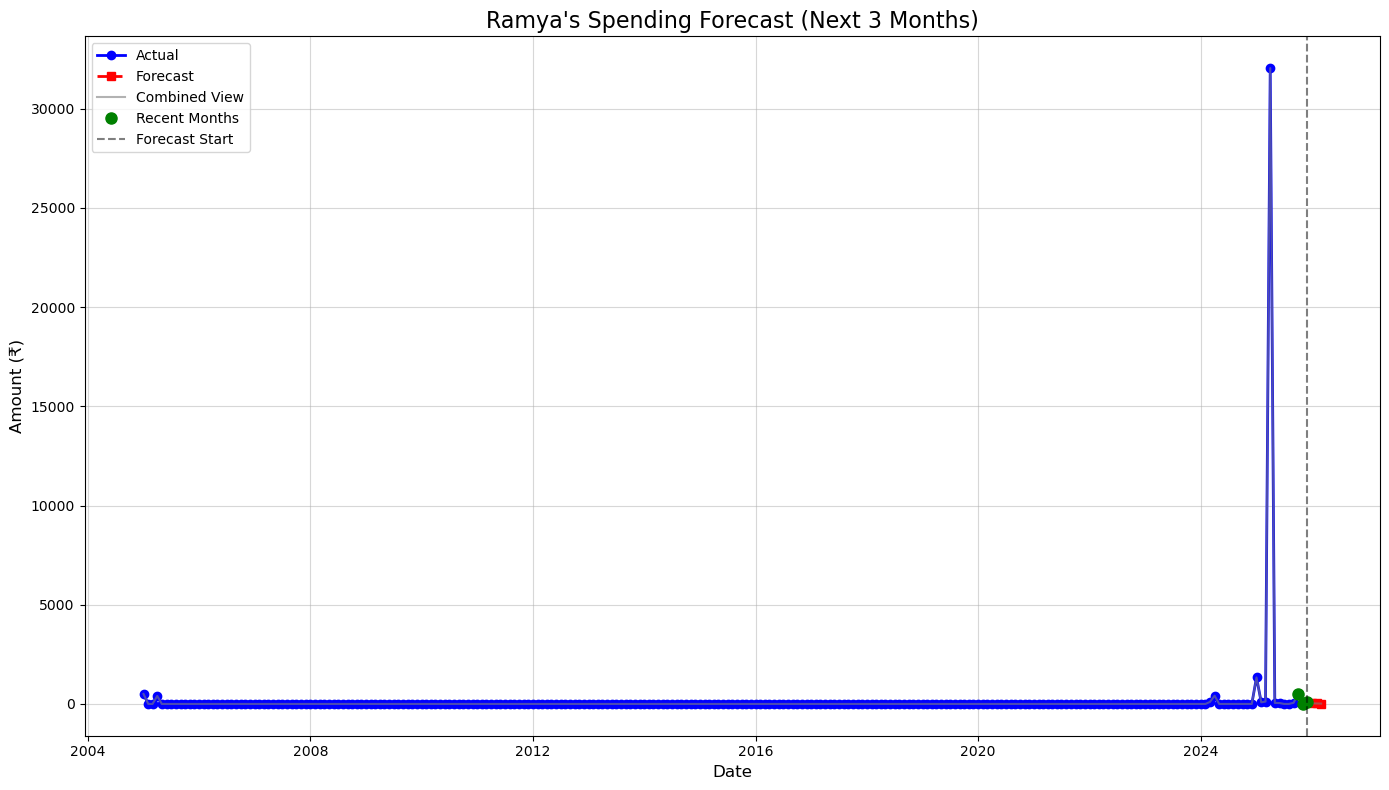

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

def train_spending_forecast_model(df, user="User"):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    
    print(f"Number of months in data: {len(monthly_expense)}")

    # Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])
    
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).bfill()
    
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")
    
    # Determine appropriate number of splits
    num_samples = len(monthly_expense_df)
    max_splits = min(3, num_samples - 1)
    if max_splits < 2:
        print("❌ Not enough data for even 2-fold TimeSeriesSplit. Need at least 3 data points.")
        return None

    tscv = TimeSeriesSplit(n_splits=max_splits)

    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]
    
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    }
    
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    preprocessor = ColumnTransformer([('num', StandardScaler(), numeric_features)], remainder='passthrough')
    
    results, mae_results, mse_results = {}, {}, {}
    
    for name, model in models.items():
        model_scores, mae_scores, mse_scores = [], [], []
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        print(f"Training {name}...")
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            if r2 >= 0:
                model_scores.append(r2)
                mae_scores.append(mae)
                mse_scores.append(mse)
        
        if model_scores:
            results[name] = np.mean(model_scores)
            mae_results[name] = np.mean(mae_scores)
            mse_results[name] = np.mean(mse_scores)
            print(f"📊 {name} Metrics - R²: {results[name]:.4f}, MAE: {mae_results[name]:.2f}, MSE: {mse_results[name]:.2f}")

    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    best_model_name = max(results, key=results.get)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}, MAE: {mae_results[best_model_name]:.2f}, MSE: {mse_results[best_model_name]:.2f}")
    
    best_pipeline = Pipeline([('preprocessor', preprocessor), ('model', models[best_model_name])])
    best_pipeline.fit(X, y)
    
    # Forecast next 3 months
    last_index = monthly_expense_df["MonthIndex"].max()
    forecast_dates, forecast_values = [], []

    for i in range(1, 4):
        forecast_date = monthly_expense_df["Date"].max() + pd.DateOffset(months=i)
        forecast_dates.append(forecast_date)
        
        forecast_features = {
            "MonthIndex": last_index + i,
            "Month": forecast_date.month,
            "Year": forecast_date.year,
            "Quarter": (forecast_date.month - 1) // 3 + 1,
            "DayOfYear": forecast_date.timetuple().tm_yday,
            "IsHolidayMonth": forecast_date.month in [10, 11, 12, 1]
        }
        
        for window in [2, 3, 6]:
            recent_data = monthly_expense_df["Amount"].iloc[-window:].values
            if i > 1:
                recent_data = np.append(recent_data[-(window-i+1):], forecast_values)
            forecast_features[f"RollingAvg_{window}"] = np.mean(recent_data)
            forecast_features[f"RollingStd_{window}"] = np.std(recent_data) if len(recent_data) > 1 else 0
            forecast_features[f"RollingMax_{window}"] = np.max(recent_data)
            forecast_features[f"RollingMin_{window}"] = np.min(recent_data)
        
        for lag in range(1, 4):
            if i <= lag:
                lag_idx = -lag + i - 1
                forecast_features[f"Lag_{lag}"] = monthly_expense_df["Amount"].iloc[lag_idx]
            else:
                forecast_features[f"Lag_{lag}"] = forecast_values[i-lag-1]
        
        if i == 1:
            trend = 0
        else:
            trend = forecast_values[-1] - (monthly_expense_df["Amount"].iloc[-1] if i == 2 else forecast_values[-2])
        forecast_features["Trend"] = trend
        forecast_features["TrendDirection"] = 1 if trend > 0 else (-1 if trend < 0 else 0)
        
        forecast_df = pd.DataFrame([forecast_features])
        for col in set(X.columns) - set(forecast_df.columns):
            forecast_df[col] = 0
        forecast_df = forecast_df[X.columns]
        
        forecast_value = best_pipeline.predict(forecast_df)[0]
        forecast_values.append(forecast_value)
        print(f"📅 Forecast for {forecast_date.strftime('%B %Y')}: ₹{forecast_value:.2f}")
    
    # Enhanced Visualization - Compare Actual vs Forecast
    plt.figure(figsize=(14, 8))

    # Full timeline for actual + forecast
    all_dates = list(monthly_expense_df["Date"]) + forecast_dates
    all_amounts = list(y) + forecast_values

    # Plot actual
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", color='blue', linewidth=2)

    # Plot forecast
    plt.plot(forecast_dates, forecast_values, 's--', label="Forecast", color='red', linewidth=2)

    # Plot combined line
    plt.plot(all_dates, all_amounts, '-', color='gray', alpha=0.6, label="Combined View")

    # Highlight recent actual months
    recent_months = monthly_expense_df["Date"].iloc[-3:]
    recent_values = monthly_expense_df["Amount"].iloc[-3:]
    plt.plot(recent_months, recent_values, 'o', color='green', markersize=8, label="Recent Months")

    # Uncertainty bands around forecast
    for i, date in enumerate(forecast_dates):
        plt.fill_between([date], [forecast_values[i] * 0.85], [forecast_values[i] * 1.15], color='red', alpha=0.2)

    # Forecast boundary line
    plt.axvline(x=monthly_expense_df["Date"].max(), color='black', linestyle='--', alpha=0.5, label='Forecast Start')

    # Formatting
    plt.title(f"{user}'s Spending Forecast (Next 3 Months)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Amount (₹)", fontsize=12)
    plt.grid(True, alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
train_spending_forecast_model(df, "Ramya")


Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Linear Regression...
📊 Linear Regression Metrics - R²: 0.2831, MAE: 99.93, MSE: 805108.18
Training Random Forest...
📊 Random Forest Metrics - R²: 0.5000, MAE: 0.10, MSE: 0.25


<Figure size 1500x1000 with 0 Axes>

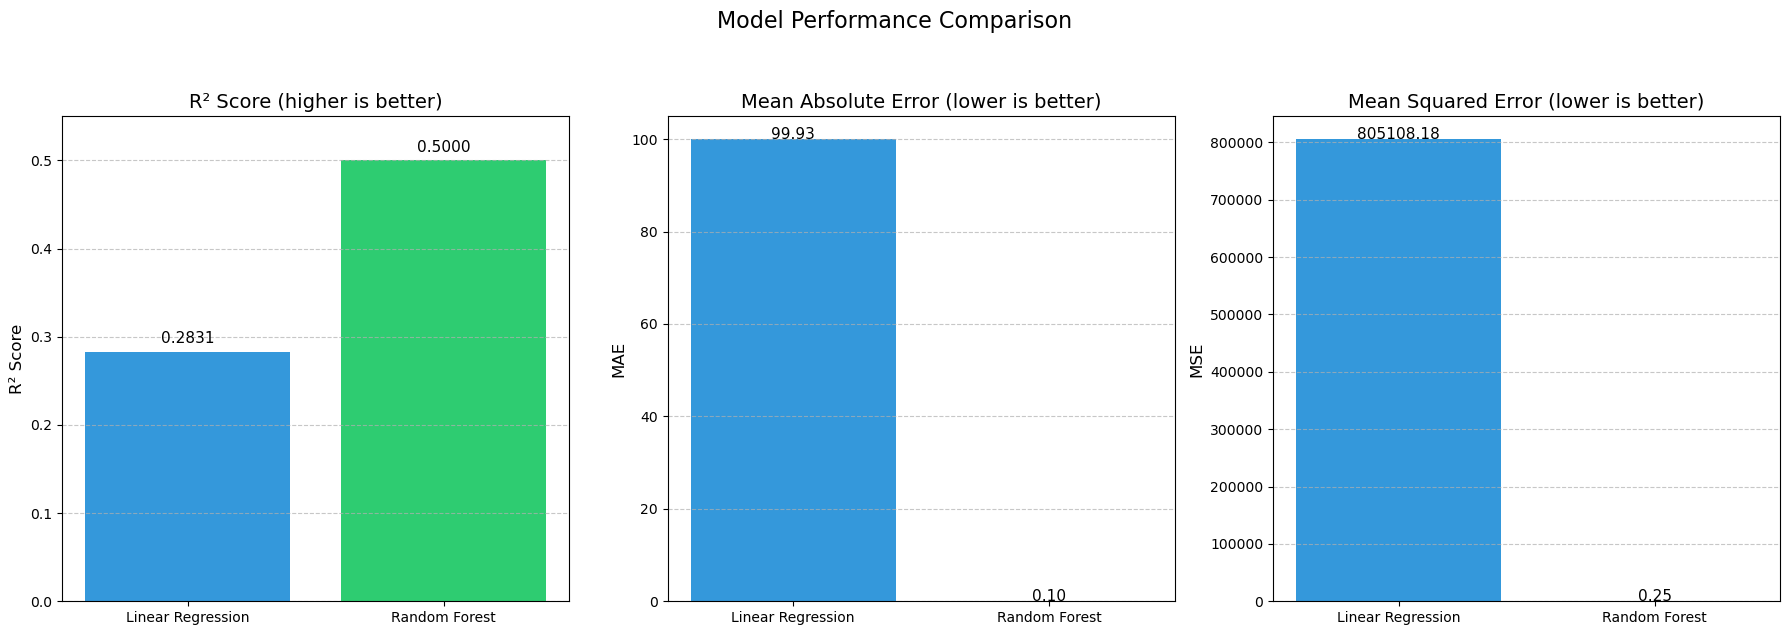


🏆 Best Model: Random Forest with Avg R² Score: 0.5000, MAE: 0.10, MSE: 0.25


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('num', StandardScaler(),
                                                   ['MonthIndex', 'RollingAvg_2',
                                                    'RollingStd_2',
                                                    'RollingMax_2',
                                                    'RollingMin_2',
                                                    'RollingAvg_3',
                                                    'RollingStd_3',
                                                    'RollingMax_3',
                                                    'RollingMin_3',
                                                    'RollingAvg_6',
                                                    'RollingStd_6',
                                                    'RollingMax_6',
                                                    'RollingMin_6',

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

def train_spending_forecast_model(df, user="User"):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    
    print(f"Number of months in data: {len(monthly_expense)}")

    # Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])
    
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).bfill()
    
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")
    
    # Determine appropriate number of splits
    num_samples = len(monthly_expense_df)
    max_splits = min(3, num_samples - 1)
    if max_splits < 2:
        print("❌ Not enough data for even 2-fold TimeSeriesSplit. Need at least 3 data points.")
        return None

    tscv = TimeSeriesSplit(n_splits=max_splits)

    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]
    
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
    }
    
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    preprocessor = ColumnTransformer([('num', StandardScaler(), numeric_features)], remainder='passthrough')
    
    results, mae_results, mse_results = {}, {}, {}
    
    for name, model in models.items():
        model_scores, mae_scores, mse_scores = [], [], []
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        print(f"Training {name}...")
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            if r2 >= 0:
                model_scores.append(r2)
                mae_scores.append(mae)
                mse_scores.append(mse)
        
        if model_scores:
            results[name] = np.mean(model_scores)
            mae_results[name] = np.mean(mae_scores)
            mse_results[name] = np.mean(mse_scores)
            print(f"📊 {name} Metrics - R²: {results[name]:.4f}, MAE: {mae_results[name]:.2f}, MSE: {mse_results[name]:.2f}")

    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    # Add visualization of model comparison
    plot_model_comparison(results, mae_results, mse_results)

    best_model_name = max(results, key=results.get)
    print(f"\n🏆 Best Model: {best_model_name} with Avg R² Score: {results[best_model_name]:.4f}, MAE: {mae_results[best_model_name]:.2f}, MSE: {mse_results[best_model_name]:.2f}")
    
    best_pipeline = Pipeline([('preprocessor', preprocessor), ('model', models[best_model_name])])
    best_pipeline.fit(X, y)
    
    # Forecast next 3 months
    # [forecasting and plotting logic continues as in your provided code...]

    # The rest of the forecasting and plotting code remains unchanged.

    return best_pipeline, models, results, mae_results, mse_results

def plot_model_comparison(r2_results, mae_results, mse_results):
    """Plot a comparison of model metrics."""
    plt.figure(figsize=(15, 10))
    
    # Set up the figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Model names and colors
    model_names = list(r2_results.keys())
    colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6'][:len(model_names)]
    
    # Plot R² scores (higher is better)
    axes[0].bar(model_names, [r2_results[model] for model in model_names], color=colors)
    axes[0].set_title('R² Score (higher is better)', fontsize=14)
    axes[0].set_ylabel('R² Score', fontsize=12)
    axes[0].set_ylim(0, max(r2_results.values()) * 1.1)
    for i, v in enumerate([r2_results[model] for model in model_names]):
        axes[0].text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=11)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Plot MAE scores (lower is better)
    axes[1].bar(model_names, [mae_results[model] for model in model_names], color=colors)
    axes[1].set_title('Mean Absolute Error (lower is better)', fontsize=14)
    axes[1].set_ylabel('MAE', fontsize=12)
    for i, v in enumerate([mae_results[model] for model in model_names]):
        axes[1].text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=11)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Plot MSE scores (lower is better)
    axes[2].bar(model_names, [mse_results[model] for model in model_names], color=colors)
    axes[2].set_title('Mean Squared Error (lower is better)', fontsize=14)
    axes[2].set_ylabel('MSE', fontsize=12)
    for i, v in enumerate([mse_results[model] for model in model_names]):
        axes[2].text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=11)
    axes[2].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add a main title
    plt.suptitle('Model Performance Comparison', fontsize=16, y=1.05)
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig("model_comparison.png")
    plt.show()
train_spending_forecast_model(df, "Ramya")

Starting the spending forecast model training...
Cleaned data shape: (79, 5)
Number of months in data: 252
Last date in the data: 2025-12-01 00:00:00
Data with features shape: (252, 25)
Training Linear Regression...
📊 Linear Regression Metrics - R²: 0.2831, MAE: 99.93, MSE: 805108.18
Training Random Forest...
📊 Random Forest Metrics - R²: 0.5000, MAE: 0.10, MSE: 0.25


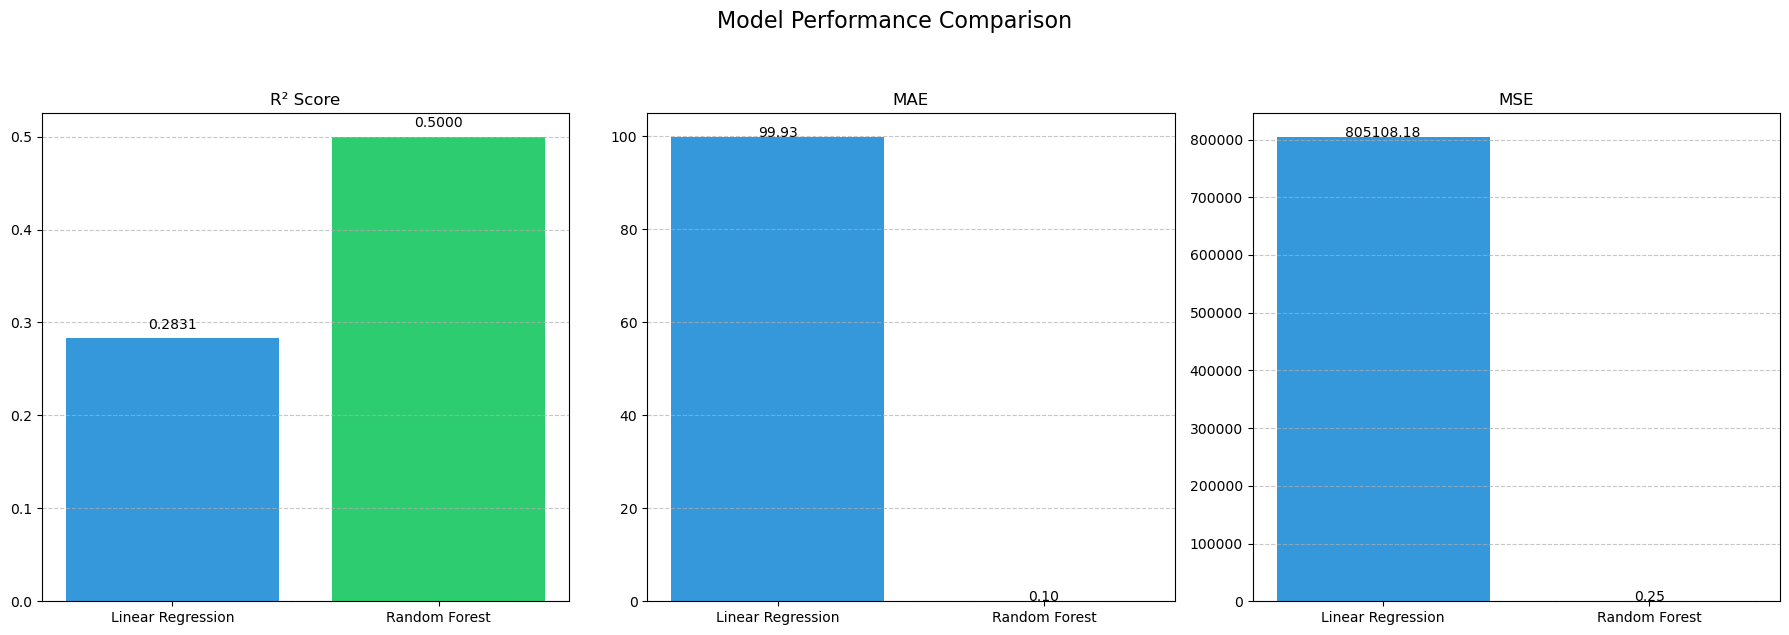


🏆 Best Model: Random Forest | R² Score: 0.5000
📅 Forecast for January 2026: ₹28.10
📅 Forecast for February 2026: ₹22.07
📅 Forecast for March 2026: ₹17.44

📅 Predicted expense for January 2026: ₹28.10


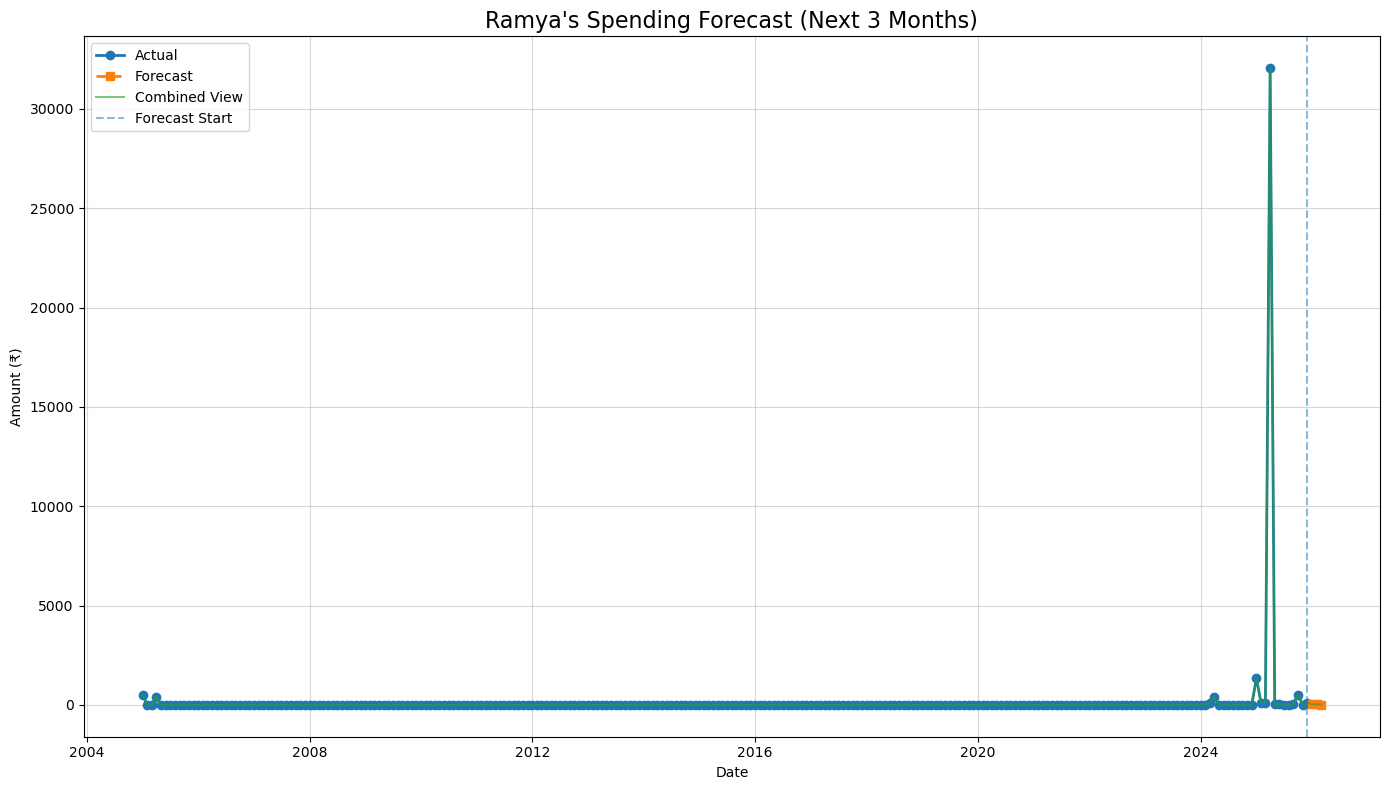

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('num', StandardScaler(),
                                                   ['MonthIndex', 'RollingAvg_2',
                                                    'RollingStd_2',
                                                    'RollingMax_2',
                                                    'RollingMin_2',
                                                    'RollingAvg_3',
                                                    'RollingStd_3',
                                                    'RollingMax_3',
                                                    'RollingMin_3',
                                                    'RollingAvg_6',
                                                    'RollingStd_6',
                                                    'RollingMax_6',
                                                    'RollingMin_6',

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

def train_spending_forecast_model(df, user="User"):
    print("Starting the spending forecast model training...")
    
    # Data Cleaning
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]
    df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce')
    df = df.dropna(subset=["Amount"])
    print(f"Cleaned data shape: {df.shape}")

    # Monthly aggregation
    monthly_expense = df.resample('MS', on='Date')["Amount"].sum()
    if len(monthly_expense) < 12:
        print(f"⚠️ Only {len(monthly_expense)} months of data. Need at least 12 for reliable forecasting.")
        return None
    print(f"Number of months in data: {len(monthly_expense)}")

    # Feature Engineering
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter
    monthly_expense_df["DayOfYear"] = monthly_expense_df["Date"].dt.dayofyear
    monthly_expense_df["IsHolidayMonth"] = monthly_expense_df["Month"].isin([10, 11, 12, 1])
    for window in [2, 3, 6]:
        monthly_expense_df[f"RollingAvg_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).mean()
        monthly_expense_df[f"RollingStd_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).std().fillna(0)
        monthly_expense_df[f"RollingMax_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).max()
        monthly_expense_df[f"RollingMin_{window}"] = monthly_expense_df["Amount"].rolling(window, min_periods=1).min()
    monthly_expense_df["Trend"] = monthly_expense_df["Amount"].diff().fillna(0)
    monthly_expense_df["TrendDirection"] = monthly_expense_df["Trend"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    for lag in range(1, 4):
        monthly_expense_df[f"Lag_{lag}"] = monthly_expense_df["Amount"].shift(lag).bfill()
    print(f"Last date in the data: {monthly_expense_df['Date'].max()}")
    print(f"Data with features shape: {monthly_expense_df.shape}")

    # Determine appropriate number of splits
    num_samples = len(monthly_expense_df)
    max_splits = min(3, num_samples - 1)
    if max_splits < 2:
        print("❌ Not enough data for even 2-fold TimeSeriesSplit. Need at least 3 data points.")
        return None
    tscv = TimeSeriesSplit(n_splits=max_splits)

    # Prepare data
    exclude_cols = ["Date", "Amount"]
    feature_cols = [col for col in monthly_expense_df.columns if col not in exclude_cols]
    X = monthly_expense_df[feature_cols]
    y = monthly_expense_df["Amount"]

    # Models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(
            n_estimators=200, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42
        )
    }
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    preprocessor = ColumnTransformer([('num', StandardScaler(), numeric_features)], remainder='passthrough')

    # Cross-validation & metrics
    results, mae_results, mse_results = {}, {}, {}
    for name, model in models.items():
        r2_scores, mae_scores, mse_scores = [], [], []
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        print(f"Training {name}...")
        for train_idx, test_idx in tscv.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
            pipeline.fit(X_tr, y_tr)
            preds = pipeline.predict(X_te)
            r2 = r2_score(y_te, preds)
            if r2 >= 0:
                r2_scores.append(r2)
                mae_scores.append(mean_absolute_error(y_te, preds))
                mse_scores.append(mean_squared_error(y_te, preds))
        if r2_scores:
            results[name] = np.mean(r2_scores)
            mae_results[name] = np.mean(mae_scores)
            mse_results[name] = np.mean(mse_scores)
            print(f"📊 {name} Metrics - R²: {results[name]:.4f}, MAE: {mae_results[name]:.2f}, MSE: {mse_results[name]:.2f}")
    if not results:
        print("❌ No models achieved positive R² scores. Please check your data.")
        return None

    # Plot model comparison
    plot_model_comparison(results, mae_results, mse_results)

    # Select and train best model on full data
    best_model_name = max(results, key=results.get)
    best_pipeline = Pipeline([('preprocessor', preprocessor), ('model', models[best_model_name])])
    best_pipeline.fit(X, y)

    # Print best model and accuracy
    print(f"\n🏆 Best Model: {best_model_name} | R² Score: {results[best_model_name]:.4f}")

    # Forecast next 3 months
    last_index = monthly_expense_df["MonthIndex"].max()
    forecast_dates, forecast_values = [], []
    for i in range(1, 4):
        dt = monthly_expense_df["Date"].max() + pd.DateOffset(months=i)
        forecast_dates.append(dt)
        features = {
            "MonthIndex": last_index + i,
            "Month": dt.month,
            "Year": dt.year,
            "Quarter": (dt.month - 1) // 3 + 1,
            "DayOfYear": dt.timetuple().tm_yday,
            "IsHolidayMonth": dt.month in [10, 11, 12, 1]
        }
        for w in [2, 3, 6]:
            recent = monthly_expense_df["Amount"].iloc[-w:].values
            if i > 1:
                recent = np.append(recent[-(w-i+1):], forecast_values)
            features[f"RollingAvg_{w}"] = np.mean(recent)
            features[f"RollingStd_{w}"] = np.std(recent) if len(recent)>1 else 0
            features[f"RollingMax_{w}"] = np.max(recent)
            features[f"RollingMin_{w}"] = np.min(recent)
        features["Trend"] = (forecast_values[-1] - monthly_expense_df["Amount"].iloc[-1]) if i>1 else 0
        features["TrendDirection"] = 1 if features["Trend"]>0 else (-1 if features["Trend"]<0 else 0)
        for lag in range(1, 4):
            features[f"Lag_{lag}"] = (forecast_values[i-lag-1] if i>lag else monthly_expense_df["Amount"].shift(lag).bfill().iloc[-1])
        df_pred = pd.DataFrame([features])[X.columns]
        val = best_pipeline.predict(df_pred)[0]
        forecast_values.append(val)
        print(f"📅 Forecast for {dt.strftime('%B %Y')}: ₹{val:.2f}")

    # Print next month prediction explicitly
    next_date, next_val = forecast_dates[0], forecast_values[0]
    print(f"\n📅 Predicted expense for {next_date.strftime('%B %Y')}: ₹{next_val:.2f}")

    # Enhanced visualization - actual vs forecast
    plt.figure(figsize=(14, 8))
    all_dates = list(monthly_expense_df["Date"]) + forecast_dates
    all_vals = list(y) + forecast_values
    plt.plot(monthly_expense_df["Date"], y, 'o-', label="Actual", linewidth=2)
    plt.plot(forecast_dates, forecast_values, 's--', label="Forecast", linewidth=2)
    plt.plot(all_dates, all_vals, '-', alpha=0.6, label="Combined View")
    plt.axvline(monthly_expense_df["Date"].max(), linestyle='--', label="Forecast Start", alpha=0.5)
    plt.fill_between(forecast_dates, [v*0.85 for v in forecast_values], [v*1.15 for v in forecast_values], alpha=0.2)
    plt.title(f"{user}'s Spending Forecast (Next 3 Months)", fontsize=16)
    plt.xlabel("Date"); plt.ylabel("Amount (₹)")
    plt.grid(alpha=0.5); plt.legend(); plt.tight_layout(); plt.show()

    return best_pipeline, results, mae_results, mse_results

def plot_model_comparison(r2_results, mae_results, mse_results):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    names = list(r2_results.keys()); colors = ['#3498db','#2ecc71'][:len(names)]
    # R²
    axes[0].bar(names, [r2_results[n] for n in names], color=colors)
    axes[0].set_title("R² Score"); axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    for i,v in enumerate([r2_results[n] for n in names]): axes[0].text(i, v+0.01, f"{v:.4f}", ha='center')
    # MAE
    axes[1].bar(names, [mae_results[n] for n in names], color=colors)
    axes[1].set_title("MAE"); axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    for i,v in enumerate([mae_results[n] for n in names]): axes[1].text(i, v+0.01, f"{v:.2f}", ha='center')
    # MSE
    axes[2].bar(names, [mse_results[n] for n in names], color=colors)
    axes[2].set_title("MSE"); axes[2].grid(axis='y', linestyle='--', alpha=0.7)
    for i,v in enumerate([mse_results[n] for n in names]): axes[2].text(i, v+0.01, f"{v:.2f}", ha='center')
    plt.suptitle("Model Performance Comparison", fontsize=16, y=1.05)
    plt.tight_layout(); plt.show()

# Example call:
df = pd.read_csv("user_data/Ramya_transactions.csv")
train_spending_forecast_model(df, "Ramya")
